In [1]:
import numpy as np 
import pandas as pd

In [2]:
UKUS_IPI=pd.read_excel("UK_Comp_US_GBRPROINDMISMEI.xlsx")
UKUS_IPI.head(5)

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI
0,1948-01-01,28.22538,14.20549
1,1948-02-01,28.22538,14.23215
2,1948-03-01,28.22538,14.07226
3,1948-04-01,28.12006,14.09893
4,1948-05-01,28.22538,14.33881


In [3]:
UKUS_IPI.isnull().sum()

DATE               0
GBRPROINDMISMEI    0
USAPROINDMISMEI    0
dtype: int64

In [4]:
#no null values

In [5]:
UKUS_IPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             915 non-null    datetime64[ns]
 1   GBRPROINDMISMEI  915 non-null    float64       
 2   USAPROINDMISMEI  915 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.6 KB


In [6]:
UKUS_IPI["DATE"]= pd.to_datetime(UKUS_IPI["DATE"], format="%m/%d/%Y")

In [7]:
UKUS_IPI["YearMonth"]= UKUS_IPI["DATE"].dt.to_period('M').astype(str)
UKUS_IPI["Year"]=UKUS_IPI["DATE"].dt.year
UKUS_IPI

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year
0,1948-01-01,28.22538,14.20549,1948-01,1948
1,1948-02-01,28.22538,14.23215,1948-02,1948
2,1948-03-01,28.22538,14.07226,1948-03,1948
3,1948-04-01,28.12006,14.09893,1948-04,1948
4,1948-05-01,28.22538,14.33881,1948-05,1948
...,...,...,...,...,...
910,2023-11-01,98.99947,102.00650,2023-11,2023
911,2023-12-01,99.63139,101.67880,2023-12,2023
912,2024-01-01,99.10479,100.91000,2024-01,2024
913,2024-02-01,100.05270,101.73570,2024-02,2024


In [8]:
import matplotlib.pyplot as plt

In [9]:
UKUS_IPI_yearly= UKUS_IPI.groupby('Year')[["GBRPROINDMISMEI","USAPROINDMISMEI"]].mean()
UKUS_IPI_yearly

,GBRPROINDMISMEI,USAPROINDMISMEI
Year,,
1948,28.699315,14.312123
1949,30.603825,13.512566
1950,32.718974,15.642500
1951,33.772159,16.966215
1952,32.455678,17.628052
...,...,...
2020,107.758472,94.238225
2021,103.580833,98.378527
2022,100.008778,101.712375


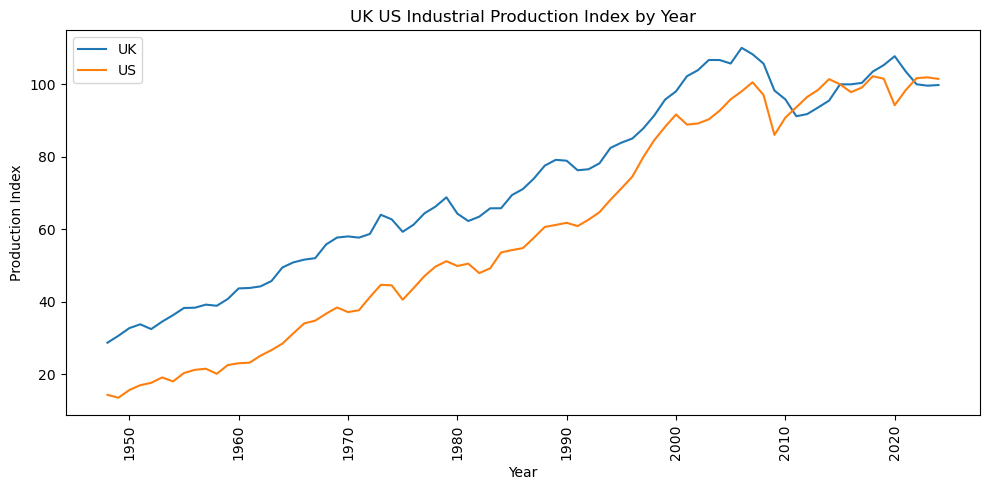

In [10]:
plt.figure(figsize=(10,5))
plt.plot(UKUS_IPI_yearly.index, UKUS_IPI_yearly["GBRPROINDMISMEI"],label="UK")
plt.plot(UKUS_IPI_yearly.index,UKUS_IPI_yearly["USAPROINDMISMEI"],label="US")
plt.title("UK US Industrial Production Index by Year")
plt.xlabel("Year")
plt.ylabel("Production Index")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Insights:

We see that till 1990, there is a visible gap in the industrial production index between Uk and US .
After 1990, US starts picking up 

In [11]:
pre_1990 = UKUS_IPI_yearly[UKUS_IPI_yearly.index <= 1990]
post_1990 = UKUS_IPI_yearly[UKUS_IPI_yearly.index > 1990]




<Figure size 2000x2000 with 0 Axes>

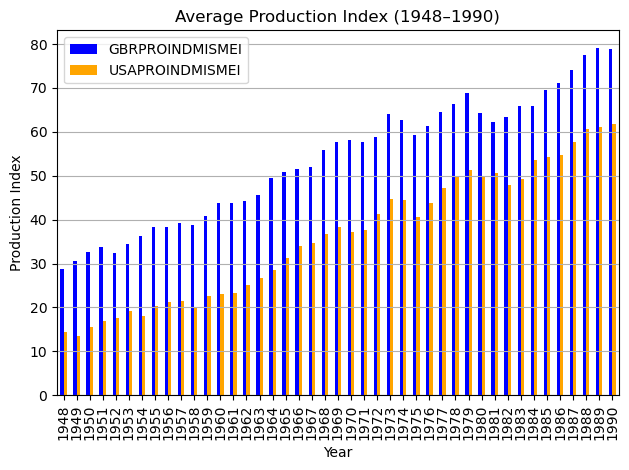

In [12]:
plt.figure(figsize=(20,20))
pre_1990.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Production Index (1948–1990)")
plt.ylabel("Production Index")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

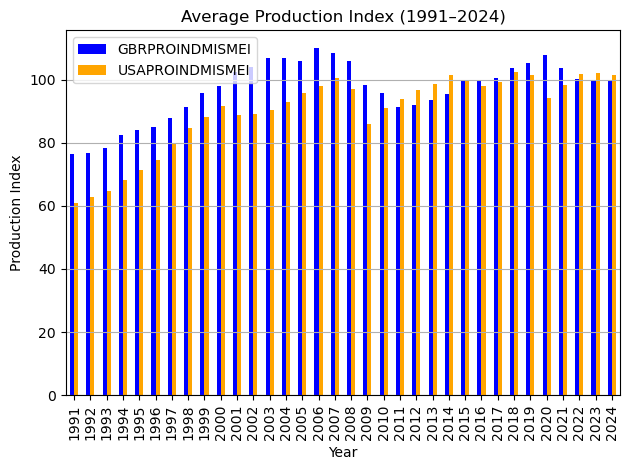

In [13]:
plt.figure(figsize=(20,20))
post_1990.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Production Index (1991–2024)")
plt.ylabel("Production Index")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1991 to 2024 is the most import period to consider when analysing US vs UK

In [14]:
UKUS_IPI_post1991= UKUS_IPI[UKUS_IPI["Year"]>1990]
UKUS_IPI_post1991

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year
516,1991-01-01,77.40916,60.55973,1991-01,1991
517,1991-02-01,77.40916,60.12268,1991-02,1991
518,1991-03-01,76.56661,59.78040,1991-03,1991
519,1991-04-01,75.51343,59.93791,1991-04,1991
520,1991-05-01,76.46130,60.53396,1991-05,1991
...,...,...,...,...,...
910,2023-11-01,98.99947,102.00650,2023-11,2023
911,2023-12-01,99.63139,101.67880,2023-12,2023
912,2024-01-01,99.10479,100.91000,2024-01,2024
913,2024-02-01,100.05270,101.73570,2024-02,2024


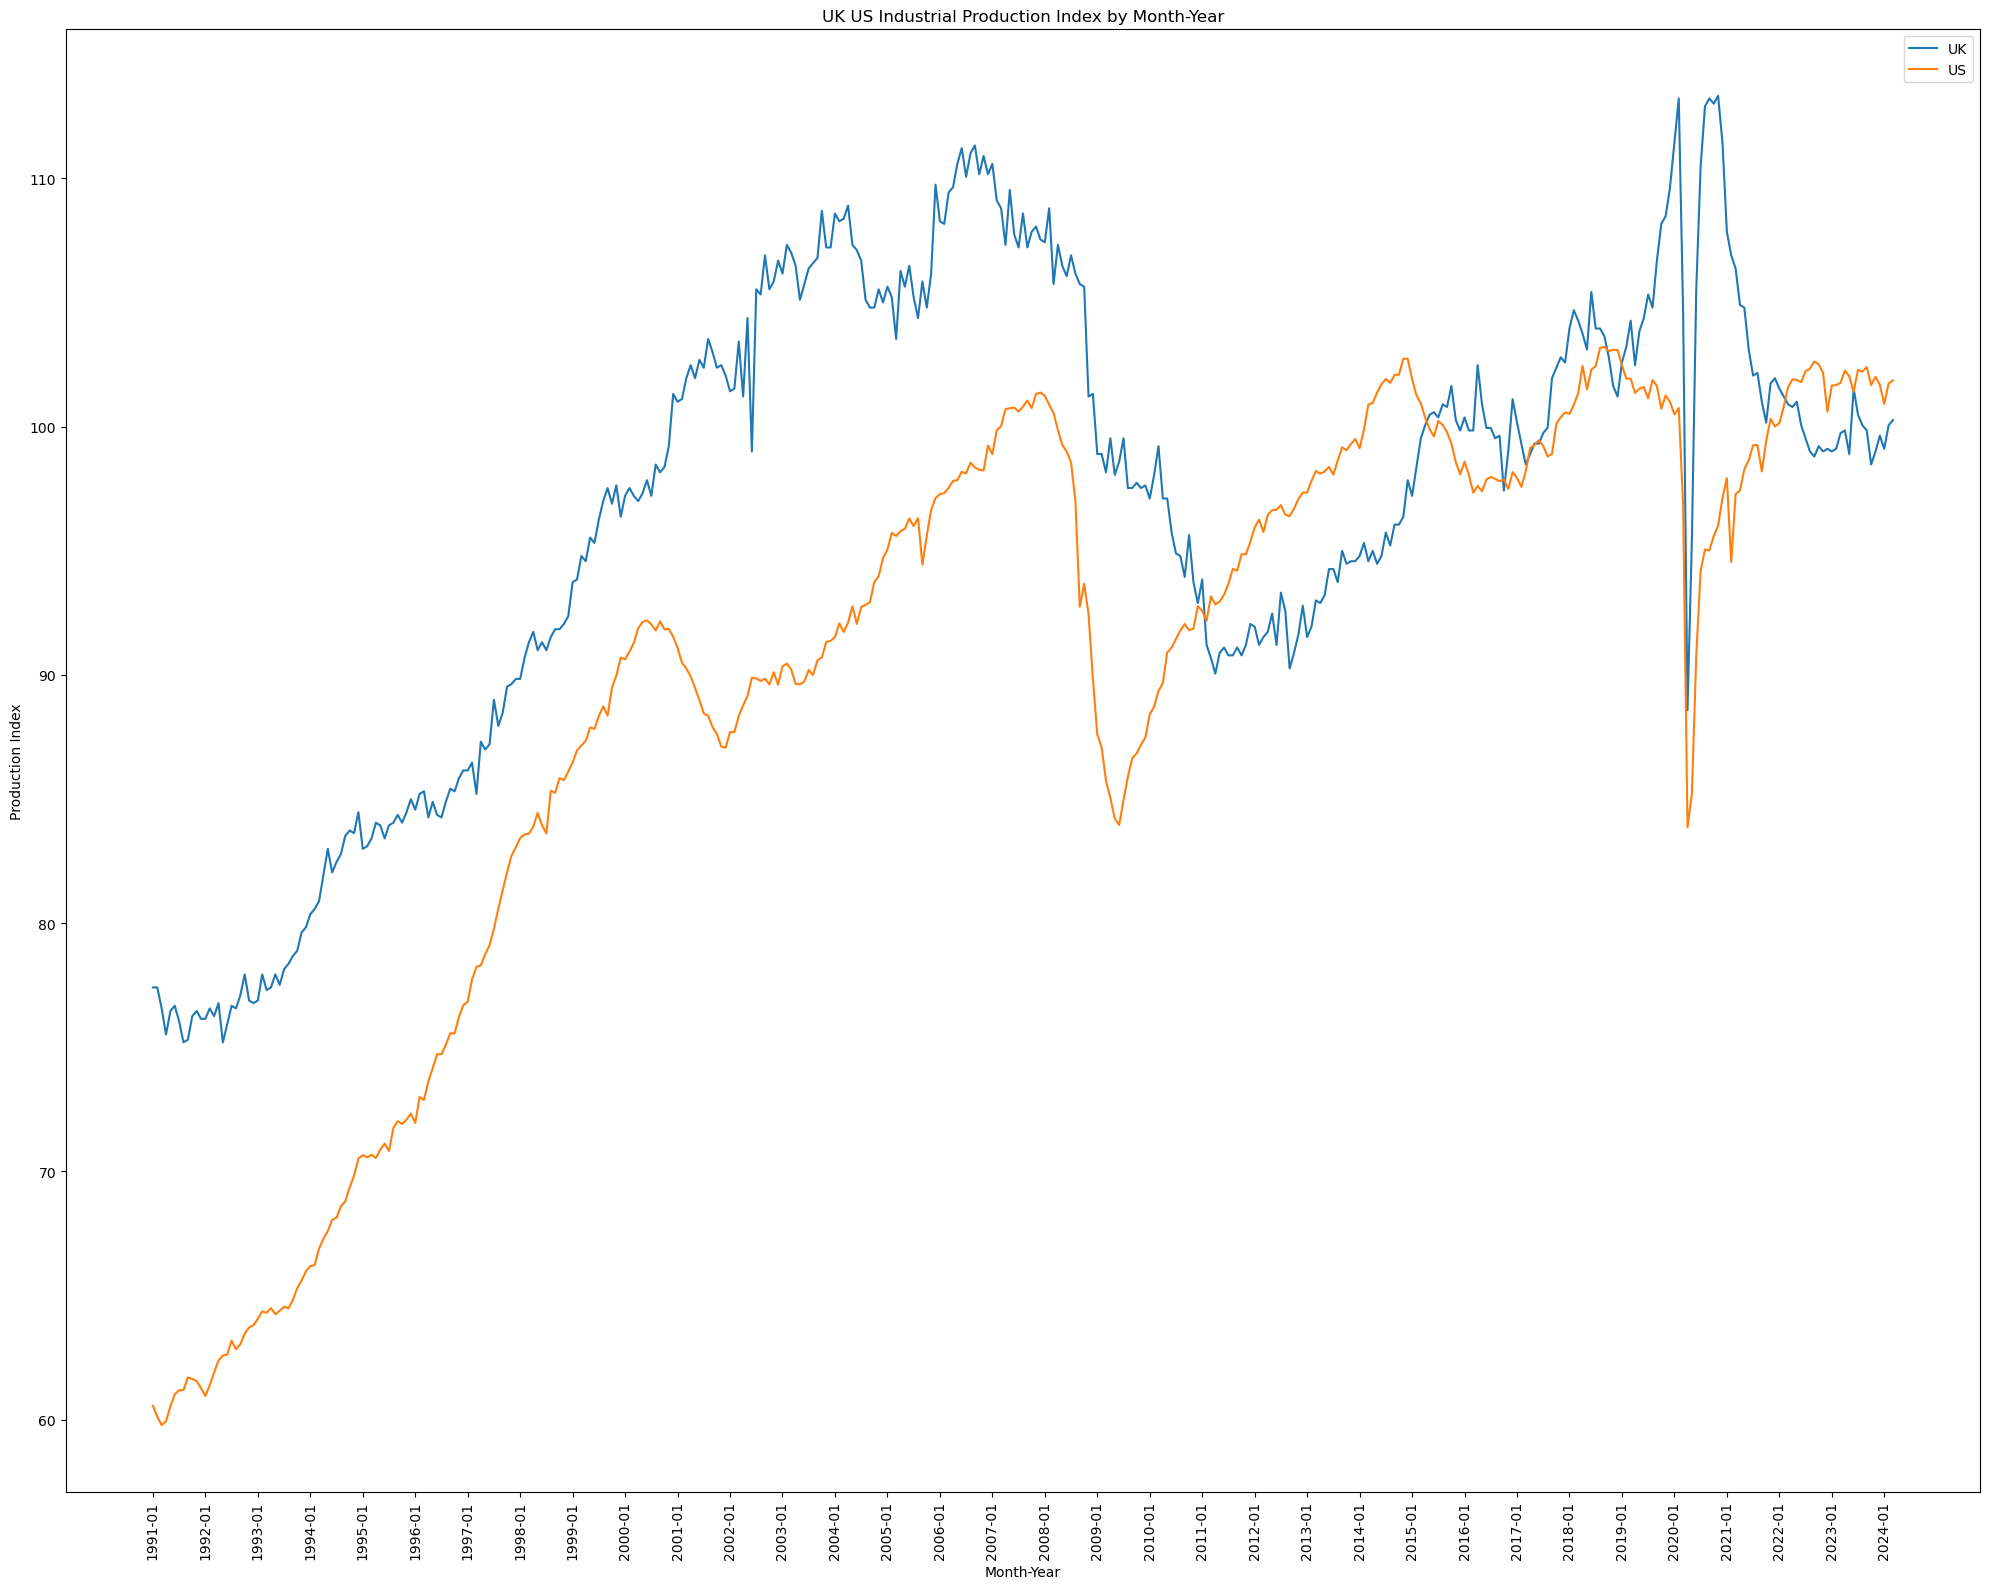

In [15]:
plt.figure(figsize=(20,16))
plt.plot(UKUS_IPI_post1991["YearMonth"],UKUS_IPI_post1991["GBRPROINDMISMEI"],label="UK")
plt.plot(UKUS_IPI_post1991["YearMonth"],UKUS_IPI_post1991["USAPROINDMISMEI"],label="US")
plt.title("UK US Industrial Production Index by Month-Year")
xtick_locs = range(0, len(UKUS_IPI_post1991), 12)
plt.xticks(ticks=xtick_locs, labels=UKUS_IPI_post1991['YearMonth'].iloc[xtick_locs], rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Production Index")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
#to check if data is stationary

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
uk_check= adfuller(UKUS_IPI["GBRPROINDMISMEI"])
uk_check

(-1.4853469358682414,
 0.5407471466252756,
 8,
 906,
 {'1%': -3.4375883271133243,
  '5%': -2.8647353885968214,
  '10%': -2.568471435365895},
 2866.334528429342)

UK IPI is non-stationary

In [19]:
us_check= adfuller(UKUS_IPI["USAPROINDMISMEI"])
us_check

(-0.7286315095055076,
 0.8391933043222884,
 11,
 903,
 {'1%': -3.43761244359048,
  '5%': -2.8647460220589736,
  '10%': -2.568477099382028},
 1814.8948518298864)

US is non-stationary

In [20]:
#Differencing to make it stationary

UKUS_IPI["GBRPROINDMISMEI_diff"]=UKUS_IPI["GBRPROINDMISMEI"].diff()
UKUS_IPI["USAPROINDMISMEI_diff"]=UKUS_IPI["USAPROINDMISMEI"].diff()

In [21]:
UKUS_IPI

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff
0,1948-01-01,28.22538,14.20549,1948-01,1948,NaN,NaN
1,1948-02-01,28.22538,14.23215,1948-02,1948,0.00000,0.02666
2,1948-03-01,28.22538,14.07226,1948-03,1948,0.00000,-0.15989
3,1948-04-01,28.12006,14.09893,1948-04,1948,-0.10532,0.02667
4,1948-05-01,28.22538,14.33881,1948-05,1948,0.10532,0.23988
...,...,...,...,...,...,...,...
910,2023-11-01,98.99947,102.00650,2023-11,2023,0.52659,0.33370
911,2023-12-01,99.63139,101.67880,2023-12,2023,0.63192,-0.32770
912,2024-01-01,99.10479,100.91000,2024-01,2024,-0.52660,-0.76880
913,2024-02-01,100.05270,101.73570,2024-02,2024,0.94791,0.82570


In [22]:
UKUS_IPI.isnull().sum()

DATE                    0
GBRPROINDMISMEI         0
USAPROINDMISMEI         0
YearMonth               0
Year                    0
GBRPROINDMISMEI_diff    1
USAPROINDMISMEI_diff    1
dtype: int64

In [23]:
uk_diff_check = adfuller(UKUS_IPI["GBRPROINDMISMEI_diff"].dropna())
us_diff_check = adfuller(UKUS_IPI["USAPROINDMISMEI_diff"].dropna())

In [24]:
uk_diff_check

(-12.052304151631917,
 2.580534889840424e-22,
 7,
 906,
 {'1%': -3.4375883271133243,
  '5%': -2.8647353885968214,
  '10%': -2.568471435365895},
 2864.218946066273)

In [25]:
us_diff_check 

(-8.139333857612119,
 1.0383498233750463e-12,
 10,
 903,
 {'1%': -3.43761244359048,
  '5%': -2.8647460220589736,
  '10%': -2.568477099382028},
 1812.2063976219051)

In [26]:
#fit model

from statsmodels.tsa.arima.model import ARIMA

In [27]:
uk_model= ARIMA(UKUS_IPI["GBRPROINDMISMEI"],order=(1,1,1))
uk_fit= uk_model.fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [28]:
us_model= ARIMA(UKUS_IPI["USAPROINDMISMEI"],order=(1,1,1))
us_fit= us_model.fit()

In [29]:
uk_forecast = uk_fit.forecast(steps=120)
us_forecast = us_fit.forecast(steps=120)


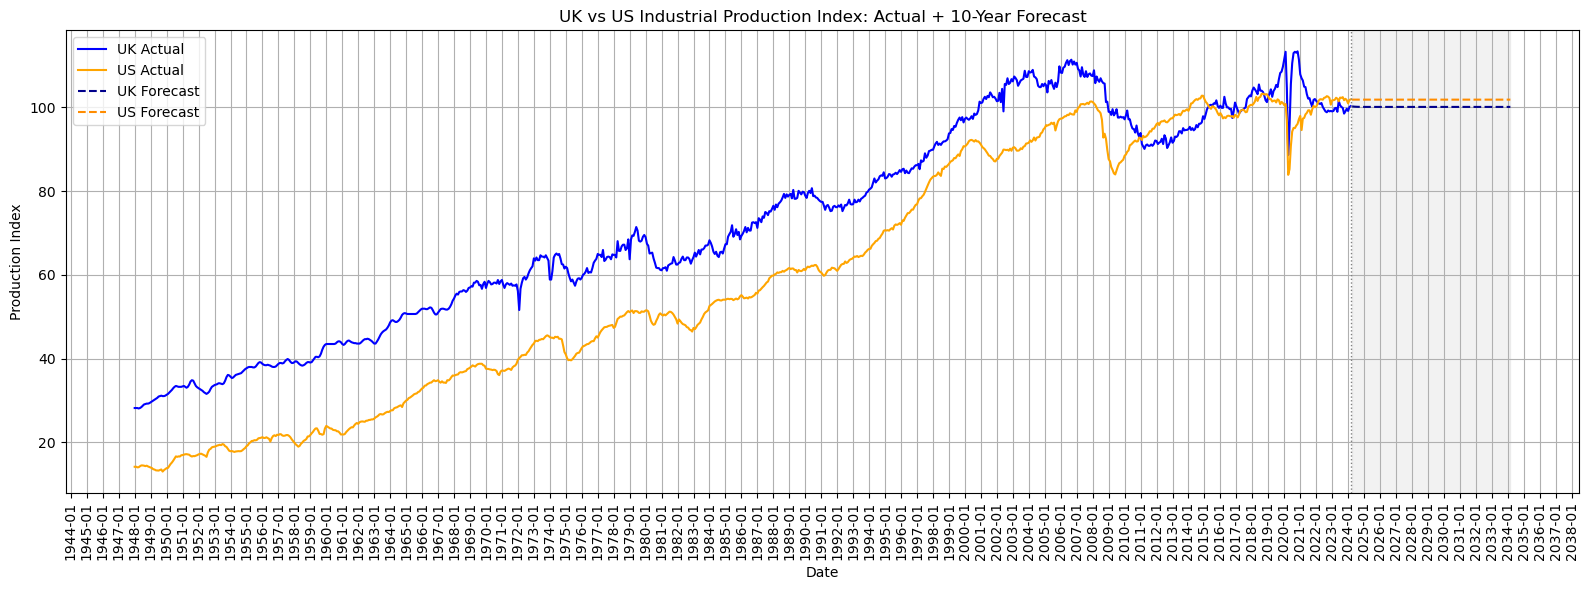

In [30]:

import matplotlib.dates as mdates


# Step 1: Create future dates for forecast
last_date = UKUS_IPI['DATE'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=120, freq='MS')

# Step 2: Assign future dates as index to forecasts
uk_forecast = pd.Series(uk_forecast.values, index=future_dates)
us_forecast = pd.Series(us_forecast.values, index=future_dates)

# Step 3: Plot
plt.figure(figsize=(16, 6))

# Actual data
plt.plot(UKUS_IPI['DATE'],UKUS_IPI['GBRPROINDMISMEI'], label='UK Actual', color='blue')
plt.plot(UKUS_IPI['DATE'], UKUS_IPI['USAPROINDMISMEI'], label='US Actual', color='orange')

# Forecast data (dashed lines)
plt.plot(uk_forecast.index, uk_forecast, label='UK Forecast', linestyle='--', color='darkblue')
plt.plot(us_forecast.index, us_forecast, label='US Forecast', linestyle='--', color='darkorange')

# Optional: vertical line where forecast begins
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=1)

# Optional: shaded region for forecast
plt.axvspan(future_dates[0], future_dates[-1], color='gray', alpha=0.1)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

plt.title("UK vs US Industrial Production Index: Actual + 10-Year Forecast")
plt.xlabel("Date")
plt.ylabel("Production Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#not happy with the forecast

checking seasonality just to confirm if us and uk industrial production has some seasonality
The graph doesnt show seasonality clearly but just to verify, using decomposition method to see if there is seasonality

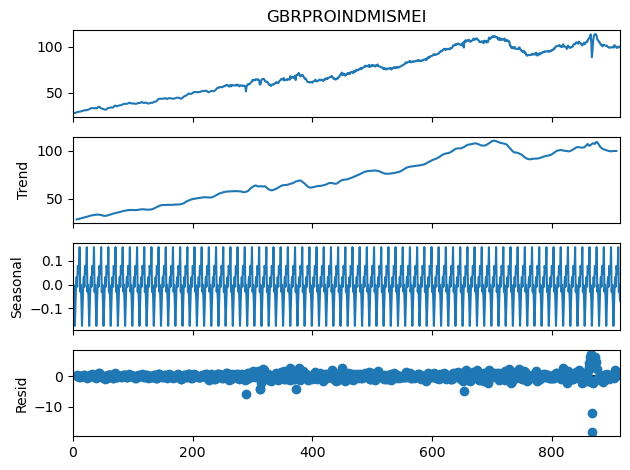

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

uk_seasonality = seasonal_decompose( UKUS_IPI['GBRPROINDMISMEI'], model='additive', period=12)
uk_seasonality.plot()
plt.show()


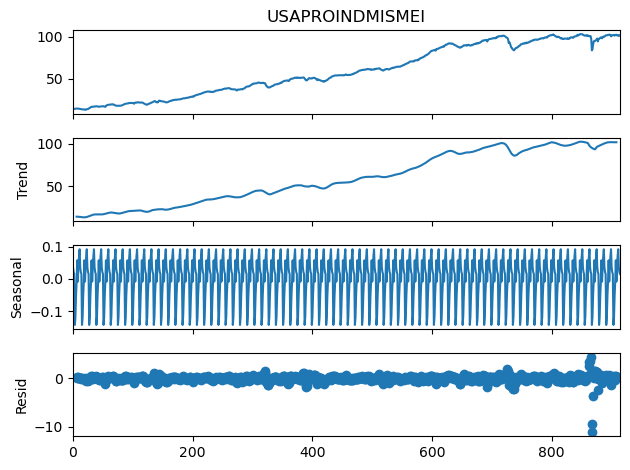

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

us_seasonality = seasonal_decompose( UKUS_IPI['USAPROINDMISMEI'], model='additive', period=12)
us_seasonality.plot()
plt.show()


Both show strong seasonality so using SARIMA

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
uk_sarima= SARIMAX(UKUS_IPI["GBRPROINDMISMEI"],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
uk_sarima_fit= uk_sarima.fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
us_sarima= SARIMAX(UKUS_IPI["USAPROINDMISMEI"],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
us_sarima_fit= us_sarima.fit()

In [36]:
uk_sarima_forecast = uk_sarima_fit.forecast(steps=120)
us_sarima_forecast = us_sarima_fit.forecast(steps=120)


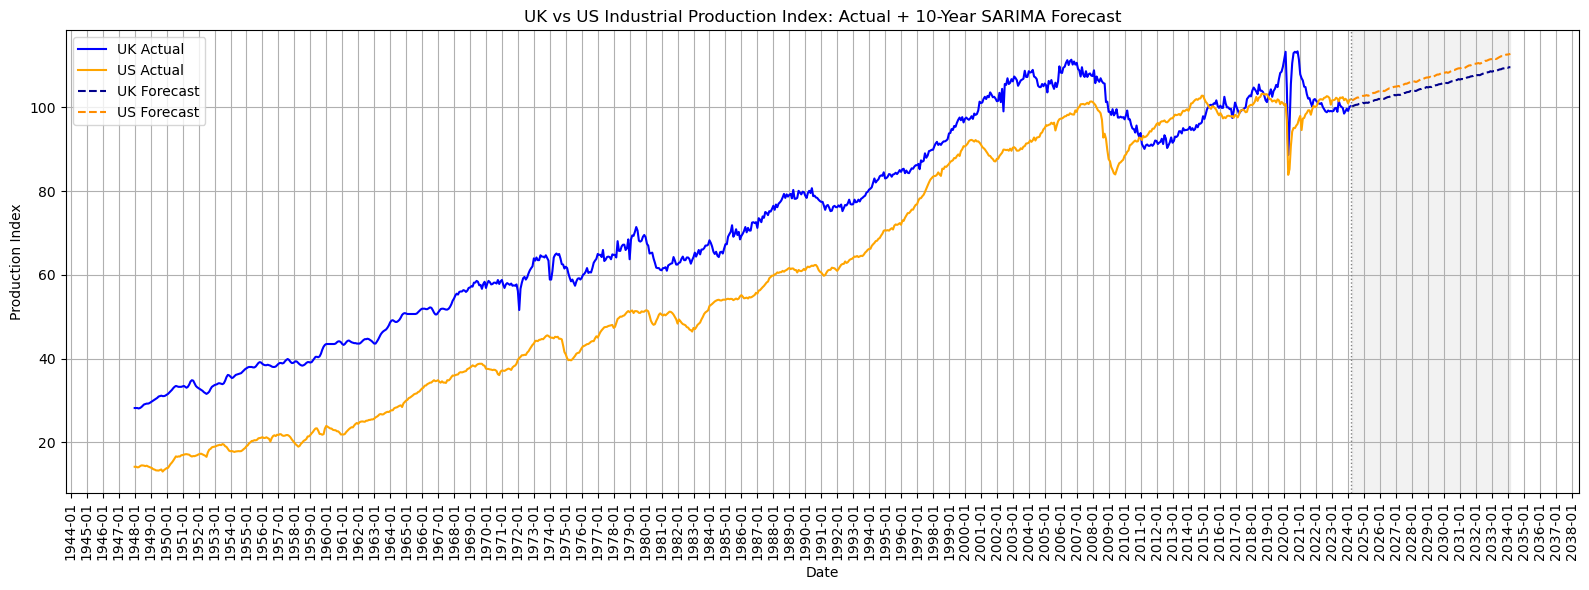

In [37]:

import matplotlib.dates as mdates


# Step 1: Create future dates for 120-month forecast
last_date = UKUS_IPI['DATE'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=120, freq='MS')

# Step 2: Assign future dates as index to SARIMA forecasts
uk_forecast = pd.Series(uk_sarima_forecast.values, index=future_dates)
us_forecast = pd.Series(us_sarima_forecast.values, index=future_dates)

# Step 3: Plot
plt.figure(figsize=(16, 6))

# Actual data
plt.plot(UKUS_IPI['DATE'], UKUS_IPI['GBRPROINDMISMEI'], label='UK Actual', color='blue')     # fixed line
plt.plot(UKUS_IPI['DATE'], UKUS_IPI['USAPROINDMISMEI'], label='US Actual', color='orange')

# Forecast data (dashed lines)
plt.plot(uk_forecast.index, uk_forecast, label='UK Forecast', linestyle='--', color='darkblue')
plt.plot(us_forecast.index, us_forecast, label='US Forecast', linestyle='--', color='darkorange')

# Optional: vertical line where forecast begins
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=1)

# Optional: shaded region for forecast
plt.axvspan(future_dates[0], future_dates[-1], color='gray', alpha=0.1)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

plt.title("UK vs US Industrial Production Index: Actual + 10-Year SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Production Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Still the forecast shows straight line : maybe because I used simple order and seasonal_order
So checking for the best order and seasonal order

In [48]:
from pmdarima import auto_arima

uk_best_check = auto_arima(
    UKUS_IPI["GBRPROINDMISMEI"],
    seasonal=True,
    m=12,
    start_p=0, max_p=2,       # limit p
    start_q=0, max_q=2,       # limit q
    start_P=0, max_P=1,       # limit P
    start_Q=0, max_Q=1,       # limit Q
    max_order=5,              # total p+q+P+Q ≤ 5
    d=1, D=1,                 # assume 1st differencing
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action='ignore',
    n_fits=20                 # try only 20 models
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3544.880, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3311.172, Time=0.59 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.04 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3546.074, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.61 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.98 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3312.319, Time=0.39 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=3306.780, Time=0.72 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=3539.529, Time=0.28 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.62 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=4.20 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=3287.621, Time=2.37 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=6.69 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=inf, Time=5

In [49]:
us_best_check = auto_arima(
    UKUS_IPI["USAPROINDMISMEI"],
    seasonal=True,
    m=12,
    start_p=0, max_p=2,       # limit p
    start_q=0, max_q=2,       # limit q
    start_P=0, max_P=1,       # limit P
    start_Q=0, max_Q=1,       # limit Q
    max_order=5,              # total p+q+P+Q ≤ 5
    d=1, D=1,                 # assume 1st differencing
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action='ignore',
    n_fits=20                 # try only 20 models
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2539.488, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2273.095, Time=0.85 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2480.383, Time=0.28 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=2.76 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2325.999, Time=0.47 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2258.546, Time=1.03 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=2450.068, Time=0.33 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.09 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=4.21 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=2258.595, Time=1.80 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2258.189, Time=1.23 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2453.107, Time=0.51 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=i

In [51]:
uk_sarima_best= SARIMAX(UKUS_IPI["GBRPROINDMISMEI"],order=(2,1,1),seasonal_order=(1, 1, 0, 12))
uk_sarima_best_fit= uk_sarima_best.fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [52]:
us_sarima_best= SARIMAX(UKUS_IPI["USAPROINDMISMEI"],order=(0,1,2),seasonal_order=(1, 1, 0, 12))
us_sarima_best_fit= us_sarima_best.fit()

In [53]:
uk_sarima_forecast_best = uk_sarima_best_fit.forecast(steps=120)
us_sarima_forecast_best = us_sarima_best_fit.forecast(steps=120)

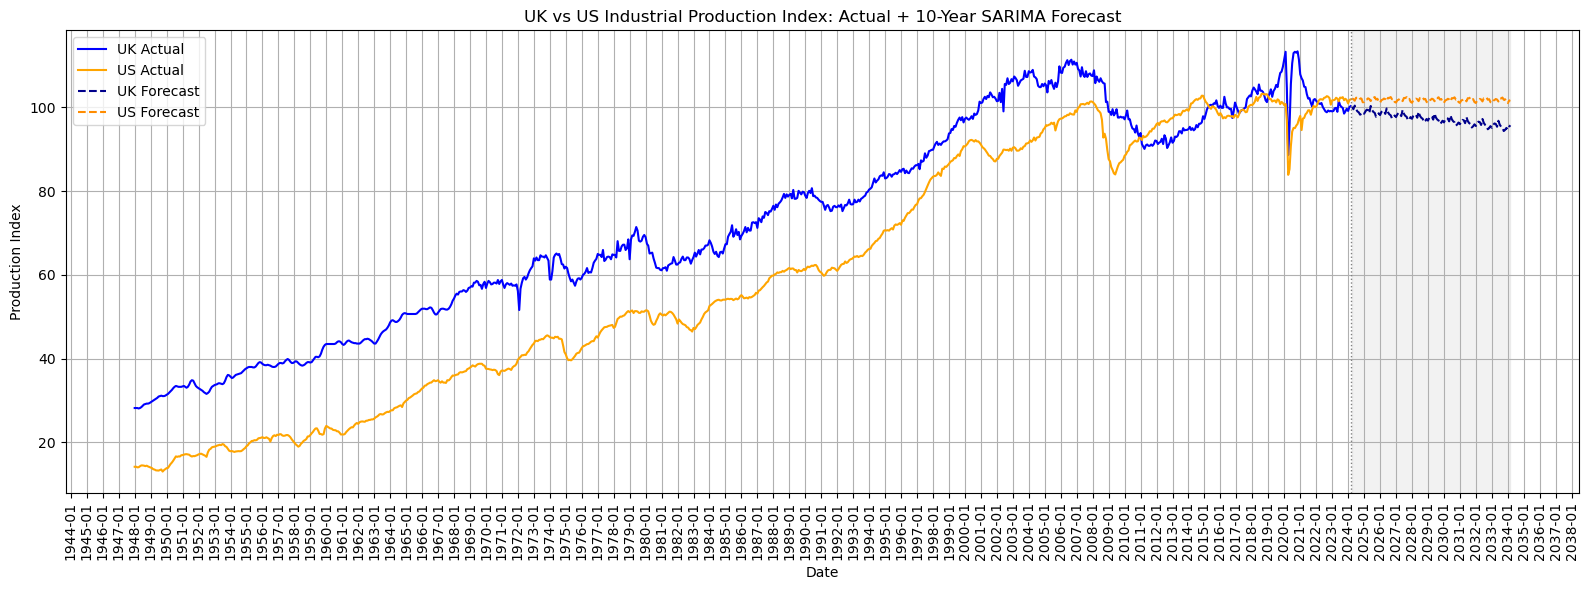

In [60]:

import matplotlib.dates as mdates


# Step 1: Create future dates for 120-month forecast
last_date = UKUS_IPI['DATE'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=120, freq='MS')

# Step 2: Assign future dates as index to SARIMA forecasts
uk_forecast = pd.Series(uk_sarima_forecast_best.values, index=future_dates)
us_forecast = pd.Series(us_sarima_forecast_best.values, index=future_dates)

# Step 3: Plot
plt.figure(figsize=(16, 6))

# Actual data
plt.plot(UKUS_IPI['DATE'], UKUS_IPI['GBRPROINDMISMEI'], label='UK Actual', color='blue')     # fixed line
plt.plot(UKUS_IPI['DATE'], UKUS_IPI['USAPROINDMISMEI'], label='US Actual', color='orange')

# Forecast data (dashed lines)
plt.plot(uk_forecast.index, uk_forecast, label='UK Forecast', linestyle='--', color='darkblue')
plt.plot(us_forecast.index, us_forecast, label='US Forecast', linestyle='--', color='darkorange')

# Optional: vertical line where forecast begins
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=1)

# Optional: shaded region for forecast
plt.axvspan(future_dates[0], future_dates[-1], color='gray', alpha=0.1)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

plt.title("UK vs US Industrial Production Index: Actual + 10-Year SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Production Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


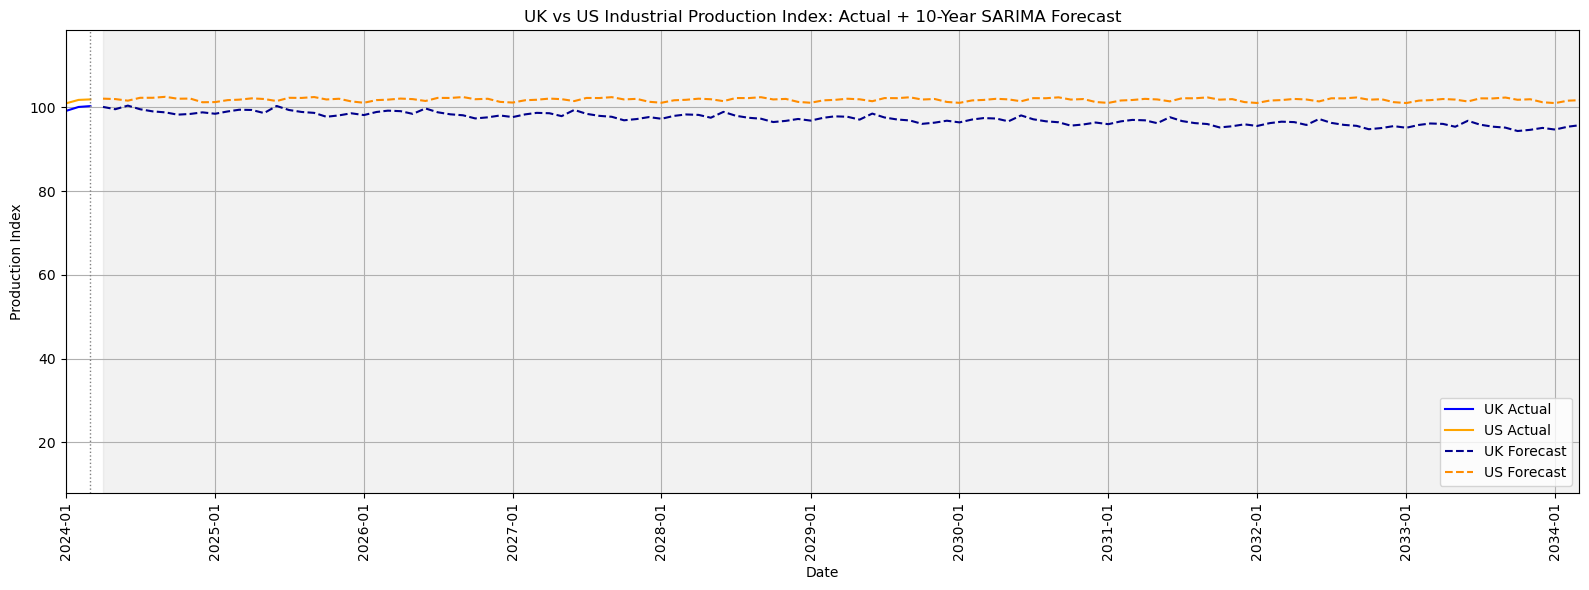

In [61]:
#zooming just the forcasted part
last_date = UKUS_IPI['DATE'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=120, freq='MS')

# Step 2: Assign future dates as index to SARIMA forecasts
uk_forecast = pd.Series(uk_sarima_forecast_best.values, index=future_dates)
us_forecast = pd.Series(us_sarima_forecast_best.values, index=future_dates)

# Step 3: Plot
plt.figure(figsize=(16, 6))

# Actual data
plt.plot(UKUS_IPI['DATE'], UKUS_IPI['GBRPROINDMISMEI'], label='UK Actual', color='blue')     # fixed line
plt.plot(UKUS_IPI['DATE'], UKUS_IPI['USAPROINDMISMEI'], label='US Actual', color='orange')

# Forecast data (dashed lines)
plt.plot(uk_forecast.index, uk_forecast, label='UK Forecast', linestyle='--', color='darkblue')
plt.plot(us_forecast.index, us_forecast, label='US Forecast', linestyle='--', color='darkorange')

# Optional: vertical line where forecast begins
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=1)

# Optional: shaded region for forecast
plt.axvspan(future_dates[0], future_dates[-1], color='gray', alpha=0.1)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

plt.title("UK vs US Industrial Production Index: Actual + 10-Year SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Production Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(['2024-01-01', future_dates[-1]])
plt.show()



## US will continue to slightly grow and outperform the UK over the next 10 years.

In [63]:
#UK sector wise data

uk_sectors= pd.read_csv("UKIndexOfProduction-15Aug2024.csv")
uk_sectors

C:\Users\aksha\AppData\Local\Temp\ipykernel_19204\3188972674.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,Title,UKManufExp: 10-33 - UK Manufacturing Total Exports (£m),UKManufDom: 10-33 - UK Manufacturing Total Domestic (£m),UKProdTO: 07-39 - UK Production TOTAL (£m),UKProdTO: 10.4 - Manufacture of vegetable and animal oils and fats TOTAL (£m),UKProdTO: 10.4 - Manufacture of vegetable and animal oils and fats EXPORT (£m),"UKProdTO: 10.6 - Manuf grain mill prods, starches & starch products TOTAL (£m)","UKProdTO: 10.6 - Manuf grain mill prods, starches & starch products EXPORT (£m",UKProdTO: 11.01-06+12 - Manuf of alcoholic beverages and tobacco TOTAL (£m),UKProdTO: 11.01-06+12 - Manuf of alcoholic beverages and tobacco EXPORT (£m),...,7+8+9:Oth Mining &Quarrying &Mining Support Service Act:CVM: annual & monthly gr,7+8+9:Oth Mining & Quarrying & Mining Support Service Activities:CVM: momy gr,7+8+9:Oth Mining & Quarrying & Mining Support Service Activities: CVM: 3mo3my gr,7+8+9:Oth Mining & Quarrying & Mining Support Service Activities: CVM: 3mo3m gr,IOP: 7+8+9: Other Mining and Quarrying plus Mining Support Service Activities,7+8+9:Oth Mining &Quarrying &Mining Support Service Act:CVM: annual & monthly gr.1,7+8+9:Oth Mining & Quarrying & Mining Support Service Activities:CVM: momy gr.1,7+8+9:Oth Mining & Quarrying & Mining Support Service Activities: CVM: 3mo3my gr.1,7+8+9:Oth Mining & Quarrying & Mining Support Service Activities: CVM: 3mo3m gr.1,IOP: 7+8+9: Other Mining and Quarrying plus Mining Support Service Activities.1
0,CDID,CSYB,CSYC,CSYD,D3L4,D3L8,D3QE,D3QF,D3QI,D3QJ,...,L2EA,L2EB,L2EC,L2ED,L2EM,L2EN,L2EP,L2EQ,L2ES,L2ET
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Release Date,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,...,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024
4,Next release,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,...,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2024 FEB,16426.4,33364.9,53078.8,120.2,13.5,559.8,103.9,1597.6,598.5,...,8.7,-7.0,-6.3,-13.2,82.5,3.1,-10.3,-8.3,-4.5,83.3
1302,2024 MAR,17438.3,34918.3,55678.4,126.3,14.6,566.8,105.3,1837.6,668.2,...,2.6,-10.1,-8.5,-2.8,84.7,-1.1,-5.6,-8.8,-4.9,82.4
1303,2024 APR,16639.5,33478.7,53603.3,128.6,13.4,570.5,104.1,1820.6,635.3,...,0.9,-2.2,-6.5,7.5,85.4,-0.2,-7.0,-7.7,-1.7,82.2
1304,2024 MAY,16640.8,34721.7,55036.9,127.7,11.5,593.1,113.2,2164.1,684.7,...,2.8,-5.0,-5.9,11.7,87.8,1.0,-5.1,-5.9,-0.7,83.0


In [65]:
uk_sectors.columns.tolist()

['Title',
 'UKManufExp: 10-33 - UK Manufacturing Total Exports (£m)',
 'UKManufDom: 10-33 - UK Manufacturing Total Domestic (£m)',
 'UKProdTO: 07-39 - UK Production TOTAL (£m)',
 'UKProdTO: 10.4 - Manufacture of vegetable and animal oils and fats TOTAL (£m)',
 'UKProdTO: 10.4 - Manufacture of vegetable and animal oils and fats EXPORT (£m)',
 'UKProdTO: 10.6 - Manuf grain mill prods, starches & starch products TOTAL (£m)',
 'UKProdTO: 10.6 - Manuf grain mill prods, starches & starch products EXPORT (£m',
 'UKProdTO: 11.01-06+12 - Manuf of alcoholic beverages and tobacco TOTAL (£m)',
 'UKProdTO: 11.01-06+12 - Manuf of alcoholic beverages and tobacco EXPORT (£m)',
 'UKProdTO: 10.4 - Manufacture of vegetable and animal oils and fats HOME (£m)',
 'UKProdTO: 10.6 - Manuf grain mill products, starches & starch products HOME (£',
 'UKProdTO: 11.01-06+12 - Manufacture of alcoholic beverages and tobacco HOME (£m)',
 '11+12: Manufacture of Beverages & Tobacco Products: CVM: Weight',
 '11+12: Manu

In [74]:
uk_iop_col=["Title"]+[col for col in uk_sectors.columns if "IOP" in col]
uk_iop_col

['Title',
 'IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA',
 'IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA',
 'IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA',
 'IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA',
 'IOP: B-E: PRODUCTION: CVMSA',
 'IOP: B:MINING AND QUARRYING: CVMSA',
 'IOP: 05:Mining Of Coal And Lignite: CVMSA',
 'IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA',
 'IOP: C:MANUFACTURING: CVMSA',
 'IOP: CA:Manufacture of Food products beverages and tobacco: CVMSA',
 'IOP: 10:Manufacture Of Food Products: CVMSA',
 'IOP: 10.1:Processing & preserving of meat & production of meat products: CVMSA',
 'IOP: 10.2-3:Process & preserve of fish crustaceans molluscs fruit veg:CVMSA',
 'IOP: 10.4:Manufacture of vegetable and animal oils and fats: CVMSA',
 'IOP: 10.5:Manufacture of dairy products: CVMSA',
 'IOP: 10.6:Manufacture of grain mill products starches & starch products

In [75]:
uk_iop_data= uk_sectors[uk_iop_col]
uk_iop_data

,Title,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA,IOP: B-E: PRODUCTION: CVMSA,IOP: B:MINING AND QUARRYING: CVMSA,IOP: 05:Mining Of Coal And Lignite: CVMSA,IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA,IOP: C:MANUFACTURING: CVMSA,...,IOP: B+CCDGHKM Mining & Quarrying plus sus-sectors CC CD CG CH CK CM: weight,IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA,IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products): Weight,IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA,IOP: CE-CF Mfr of chemical & chem prods + mfr of basic pharm & preps: weight,"IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA,IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA,IOP: 7+8+9: Other Mining and Quarrying plus Mining Support Service Activities,IOP: 7+8+9: Other Mining and Quarrying plus Mining Support Service Activities.1
0,CDID,DM4G,DM4H,DM5U,DM5V,K222,K224,K225,K226,K22A,...,KUL6,KUL7,KUM2,KUM3,KUM6,KUM7,KUN2,KUN5,L2EM,L2ET
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NaN,NaN,NaN,NaN,"Index, base year = 100",NaN,NaN,NaN,"Index, base year = 100",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Release Date,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,...,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024
4,Next release,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,...,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2024 FEB,92.1,103.1,96.8,106.4,94.8,62.4,35.0,58.5,102.6,...,NaN,101.0,NaN,100.7,NaN,85.0,102.9,102.1,82.5,83.3
1302,2024 MAR,102.5,104.2,106.2,107.3,95.0,63.0,33.4,59.4,102.7,...,NaN,106.9,NaN,112.3,NaN,85.3,103.0,106.9,84.7,82.4
1303,2024 APR,100.8,100.7,103.5,104.0,94.0,63.4,27.7,60.0,101.0,...,NaN,100.9,NaN,103.6,NaN,84.6,101.4,102.6,85.4,82.2
1304,2024 MAY,112.8,103.5,117.1,107.9,94.3,62.9,30.0,59.3,101.4,...,NaN,103.7,NaN,105.7,NaN,84.9,101.8,103.0,87.8,83.0


In [77]:
import re

uk_iop_cvm_col = ["Title"]+[col for col in uk_iop_data.columns if re.search(r'CVM\S*', col)]
uk_iop_cvm_col

['Title',
 'IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA',
 'IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA',
 'IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA',
 'IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA',
 'IOP: B-E: PRODUCTION: CVMSA',
 'IOP: B:MINING AND QUARRYING: CVMSA',
 'IOP: 05:Mining Of Coal And Lignite: CVMSA',
 'IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA',
 'IOP: C:MANUFACTURING: CVMSA',
 'IOP: CA:Manufacture of Food products beverages and tobacco: CVMSA',
 'IOP: 10:Manufacture Of Food Products: CVMSA',
 'IOP: 10.1:Processing & preserving of meat & production of meat products: CVMSA',
 'IOP: 10.2-3:Process & preserve of fish crustaceans molluscs fruit veg:CVMSA',
 'IOP: 10.4:Manufacture of vegetable and animal oils and fats: CVMSA',
 'IOP: 10.5:Manufacture of dairy products: CVMSA',
 'IOP: 10.6:Manufacture of grain mill products starches & starch products

In [78]:
uk_iop_cvm_data= uk_iop_data[uk_iop_cvm_col]
uk_iop_cvm_data

,Title,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA,IOP: B-E: PRODUCTION: CVMSA,IOP: B:MINING AND QUARRYING: CVMSA,IOP: 05:Mining Of Coal And Lignite: CVMSA,IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA,IOP: C:MANUFACTURING: CVMSA,...,IOP: MIG-CD:Main Industrial Groupings - Consumer Durables: CVMNSA,IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMNSA,IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMNSA,IOP: MIG-NRG:Main Industrial Groupings - Energy: CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sectors CC, CD, CH, CK,CM) CVMNSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA,IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA,IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA
0,CDID,DM4G,DM4H,DM5U,DM5V,K222,K224,K225,K226,K22A,...,K27L,K27M,K27N,K27O,KUL3,KUL7,KUM3,KUM7,KUN2,KUN5
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NaN,NaN,NaN,NaN,"Index, base year = 100",NaN,NaN,NaN,"Index, base year = 100",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Release Date,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,...,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024,15-08-2024
4,Next release,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,...,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24,11-Sep-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2024 FEB,92.1,103.1,96.8,106.4,94.8,62.4,35.0,58.5,102.6,...,103.6,109.0,108.1,71.8,83.8,101.0,100.7,85.0,102.9,102.1
1302,2024 MAR,102.5,104.2,106.2,107.3,95.0,63.0,33.4,59.4,102.7,...,116.1,120.0,113.3,73.3,89.8,106.9,112.3,85.3,103.0,106.9
1303,2024 APR,100.8,100.7,103.5,104.0,94.0,63.4,27.7,60.0,101.0,...,102.8,112.6,103.4,67.5,85.9,100.9,103.6,84.6,101.4,102.6
1304,2024 MAY,112.8,103.5,117.1,107.9,94.3,62.9,30.0,59.3,101.4,...,104.5,118.5,105.4,66.1,87.6,103.7,105.7,84.9,101.8,103.0


In [79]:
#covert to csv

uk_iop_cvm_data.to_csv("C:/Users/aksha/OneDrive/Desktop/Assignments_sem4/forcasting_UK_US_project/UK_IOP_CVM_Data.csv", index=False)

In [81]:
#dividing the UK data by year, quarter and months


uk_iop_cvm_data.describe()


,Title,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA,IOP: B-E: PRODUCTION: CVMSA,IOP: B:MINING AND QUARRYING: CVMSA,IOP: 05:Mining Of Coal And Lignite: CVMSA,IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA,IOP: C:MANUFACTURING: CVMSA,...,IOP: MIG-CD:Main Industrial Groupings - Consumer Durables: CVMNSA,IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMNSA,IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMNSA,IOP: MIG-NRG:Main Industrial Groupings - Energy: CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sectors CC, CD, CH, CK,CM) CVMNSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA,IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA,IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA
count,1306,470.0,470.0,470.0,470.0,1304.0,1303.0,470.0,470,1304.0,...,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0
unique,1306,364.0,320.0,394.0,388.0,741.0,1116.0,465.0,425,715.0,...,386.0,348.0,382.0,433.0,364.0,334.0,362.0,317.0,313.0,362.0
top,CDID,103.2,99.3,113.5,127.8,41.3,316.2,27.6,96.5,39.3,...,27.9,95.3,103.8,83.9,96.8,90.6,97.6,124.6,85.0,84.6
freq,1,6.0,6.0,3.0,3.0,9.0,5.0,2.0,4,11.0,...,5.0,4.0,5.0,3.0,4.0,5.0,4.0,5.0,6.0,5.0


In [84]:
uk_iop_cvm_data.dtypes

Title                                                                               object
IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA                     object
IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA                      object
IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA      object
IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA       object
                                                                                     ...  
IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA      object
IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA     object
IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA    object
IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA       object
IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA      object

In [85]:
uk_iop_cvm_data_year= uk_iop_cvm_data[uk_iop_cvm_data["Title"].str.match(r'^\d{4}$')]
uk_iop_cvm_data_year

,Title,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA,IOP: B-E: PRODUCTION: CVMSA,IOP: B:MINING AND QUARRYING: CVMSA,IOP: 05:Mining Of Coal And Lignite: CVMSA,IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA,IOP: C:MANUFACTURING: CVMSA,...,IOP: MIG-CD:Main Industrial Groupings - Consumer Durables: CVMNSA,IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMNSA,IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMNSA,IOP: MIG-NRG:Main Industrial Groupings - Energy: CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sectors CC, CD, CH, CK,CM) CVMNSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA,IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA,IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA
6,1948,NaN,NaN,NaN,NaN,27.3,553.4,NaN,NaN,25.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1949,NaN,NaN,NaN,NaN,29.1,570.8,NaN,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1950,NaN,NaN,NaN,NaN,31.1,575.7,NaN,NaN,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1951,NaN,NaN,NaN,NaN,32.1,593.1,NaN,NaN,29.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1952,NaN,NaN,NaN,NaN,30.8,598.9,NaN,NaN,28.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
78,2020,105.9,105.9,115.6,115.6,102.3,100.1,59.4,100.5,102.2,...,101.1,104.7,101.7,101.7,100.3,102.5,111.6,100.3,102.5,111.6
79,2021,107.4,107.4,114.3,114.3,98.3,76.7,32.5,73.5,103.8,...,106.6,113.1,103.3,77,94.7,104.2,107.3,94.7,104.2,107.3
80,2022,106,106,110.9,110.9,95,75.9,26.1,72.1,100.4,...,107.3,113.1,97.5,72.7,90.4,100.6,102.8,90.4,100.6,102.8


In [87]:
uk_iop_cvm_data_qua= uk_iop_cvm_data[uk_iop_cvm_data["Title"].str.match(r'^\d{4} Q\d$')]
uk_iop_cvm_data_qua

,Title,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA,IOP: B-E: PRODUCTION: CVMSA,IOP: B:MINING AND QUARRYING: CVMSA,IOP: 05:Mining Of Coal And Lignite: CVMSA,IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA,IOP: C:MANUFACTURING: CVMSA,...,IOP: MIG-CD:Main Industrial Groupings - Consumer Durables: CVMNSA,IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMNSA,IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMNSA,IOP: MIG-NRG:Main Industrial Groupings - Energy: CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sectors CC, CD, CH, CK,CM) CVMNSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA,IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA,IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA
82,1948 Q1,NaN,NaN,NaN,NaN,26.8,557.7,NaN,NaN,24.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,1948 Q2,NaN,NaN,NaN,NaN,26.9,543.3,NaN,NaN,24.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,1948 Q3,NaN,NaN,NaN,NaN,27.5,554.7,NaN,NaN,25.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,1948 Q4,NaN,NaN,NaN,NaN,27.8,557.7,NaN,NaN,25.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1949 Q1,NaN,NaN,NaN,NaN,28.3,559.8,NaN,NaN,26.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2023 Q2,108.3,104.2,111.4,108.5,95,65.8,19.9,61.7,102.2,...,107.6,114.3,103.2,65.4,88.2,102.1,105.9,88.1,102.4,104.9
384,2023 Q3,108.2,103.6,112.9,109.3,95.1,65.9,25.5,62,102.2,...,104.7,114.9,101.6,62.4,86.2,100.9,103.6,87.2,102.5,105.6
385,2023 Q4,103.5,100.5,110,104.7,94,64.1,33.5,60,101.2,...,110.5,118.5,109.2,69.3,84.3,103.1,102.5,84.7,101.6,104.2
386,2024 Q1,91.5,102.3,95.4,105.5,94.6,62.7,34.2,59.2,102.3,...,106.2,112,108.6,73.4,85.5,102.1,103.9,85.1,102.6,103


In [135]:
uk_iop_cvm_data_month= uk_iop_cvm_data[uk_iop_cvm_data["Title"].str.match(r'^\d{4} [A-Z]{3}$')]
uk_iop_cvm_data_month

,Title,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA,IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA,IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA,IOP: B-E: PRODUCTION: CVMSA,IOP: B:MINING AND QUARRYING: CVMSA,IOP: 05:Mining Of Coal And Lignite: CVMSA,IOP: 06:Extraction Of Crude Petroleum And Natural Gas: CVMSA,IOP: C:MANUFACTURING: CVMSA,...,IOP: MIG-CD:Main Industrial Groupings - Consumer Durables: CVMNSA,IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMNSA,IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMNSA,IOP: MIG-NRG:Main Industrial Groupings - Energy: CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sectors CC, CD, CH, CK,CM) CVMNSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA,IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA,"IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA",IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA,IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA
388,1948 JAN,NaN,NaN,NaN,NaN,26.8,559.5,NaN,NaN,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,1948 FEB,NaN,NaN,NaN,NaN,26.8,559.7,NaN,NaN,24.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,1948 MAR,NaN,NaN,NaN,NaN,26.8,554,NaN,NaN,24.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,1948 APR,NaN,NaN,NaN,NaN,26.7,545.9,NaN,NaN,24.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,1948 MAY,NaN,NaN,NaN,NaN,26.8,541.1,NaN,NaN,24.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2024 FEB,92.1,103.1,96.8,106.4,94.8,62.4,35.0,58.5,102.6,...,103.6,109.0,108.1,71.8,83.8,101.0,100.7,85.0,102.9,102.1
1302,2024 MAR,102.5,104.2,106.2,107.3,95.0,63.0,33.4,59.4,102.7,...,116.1,120.0,113.3,73.3,89.8,106.9,112.3,85.3,103.0,106.9
1303,2024 APR,100.8,100.7,103.5,104.0,94.0,63.4,27.7,60.0,101.0,...,102.8,112.6,103.4,67.5,85.9,100.9,103.6,84.6,101.4,102.6
1304,2024 MAY,112.8,103.5,117.1,107.9,94.3,62.9,30.0,59.3,101.4,...,104.5,118.5,105.4,66.1,87.6,103.7,105.7,84.9,101.8,103.0


In [91]:
uk_iop_cvm_data_year.isnull().sum()

Title                                                                                0
IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMNSA                     49
IOP: 11+12: Manufacture of Beverages & Tobacco Products: CVMSA                      49
IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMNSA      49
IOP: 11.01-6+12: Manufacture of alcoholic beverages & tobacco products: CVMSA       49
                                                                                    ..
IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMNSA      49
IOP: CE-CF Mrf of chemical & chemical prods + mfr of basic pharm & preps CVMNSA     49
IOP: B+CCDGHKM Mining & quarrying (plus sub sector CC, CD, CG, CH, CK, CM) CVMSA    49
IOP: C-19 Manufacturing (excl Mfr of coke & refined petroleum products) CVMSA       49
IOP: CE-CF Mfr of chemical & chemical prods + mrf of basic pharm & preps CVMSA      49
Length: 174, dtype: int64

In [136]:
uk_iop_cvm_data_filter = uk_iop_cvm_data_month[
    [
        "Title",
        "IOP: B-E: PRODUCTION: CVMSA",
        "IOP: C:MANUFACTURING: CVMSA",
        "IOP: D:ELECTRICITY GAS STEAM AND AIR CONDITIONING SUPPLY: CVMSA",
        "IOP: E:WATER SUPPLY;SEWERAGEWASTE MANAGEMENT & REMEDIATION ACTIVITIES: CVMSA",
        "IOP: MIG-IG:Main Industrial Groupings - Intermediate Goods: CVMSA",
        "IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMSA",
        "IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMSA",
        "IOP: 29:Manufacture Of Motor Vehicles Trailers And Semi-Trailers: CVMSA",
        "IOP: 21:Manuf Of Basic Pharmaceutical Prods & Pharmaceutical Preparation:CVMNSA",
        "IOP: 35:Electricity Gas Steam And Air Conditioning Supply: CVMSA"
    ]
]


In [137]:
uk_iop_cvm_data_filter

,Title,IOP: B-E: PRODUCTION: CVMSA,IOP: C:MANUFACTURING: CVMSA,IOP: D:ELECTRICITY GAS STEAM AND AIR CONDITIONING SUPPLY: CVMSA,IOP: E:WATER SUPPLY;SEWERAGEWASTE MANAGEMENT & REMEDIATION ACTIVITIES: CVMSA,IOP: MIG-IG:Main Industrial Groupings - Intermediate Goods: CVMSA,IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMSA,IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMSA,IOP: 29:Manufacture Of Motor Vehicles Trailers And Semi-Trailers: CVMSA,IOP: 21:Manuf Of Basic Pharmaceutical Prods & Pharmaceutical Preparation:CVMNSA,IOP: 35:Electricity Gas Steam And Air Conditioning Supply: CVMSA
388,1948 JAN,26.8,24.6,12,28.9,NaN,NaN,NaN,NaN,NaN,NaN
389,1948 FEB,26.8,24.7,12.1,29,NaN,NaN,NaN,NaN,NaN,NaN
390,1948 MAR,26.8,24.7,12.1,29.2,NaN,NaN,NaN,NaN,NaN,NaN
391,1948 APR,26.7,24.7,12.1,29.4,NaN,NaN,NaN,NaN,NaN,NaN
392,1948 MAY,26.8,24.8,12.1,29.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1301,2024 FEB,94.8,102.6,61.9,100.8,86.4,108.8,114.9,136.3,122.2,61.9
1302,2024 MAR,95.0,102.7,62.3,100.9,86.7,106.6,117.8,127.0,141.1,62.3
1303,2024 APR,94.0,101.0,62.6,102.8,85.2,106.7,113.9,126.1,123.6,62.6
1304,2024 MAY,94.3,101.4,63.3,102.6,85.3,106.6,115.2,125.0,127.6,63.3


In [138]:
uk_iop_cvm_data_filter = uk_iop_cvm_data_filter.rename(columns={
    "Title": "Year",
    "IOP: B-E: PRODUCTION: CVMSA": "Total_Industrial_Production",
    "IOP: C:MANUFACTURING: CVMSA": "Manufacturing",
    "IOP: D:ELECTRICITY GAS STEAM AND AIR CONDITIONING SUPPLY: CVMSA": "Energy_Supply",
    "IOP: E:WATER SUPPLY;SEWERAGEWASTE MANAGEMENT & REMEDIATION ACTIVITIES: CVMSA": "Water_Waste_Services",
    "IOP: MIG-IG:Main Industrial Groupings - Intermediate Goods: CVMSA": "Intermediate_Goods",
    "IOP: MIG-CAG:Main Industrial Groupings - Capital Goods: CVMSA": "Capital_Goods",
    "IOP: MIG-CND:Main Industrial Groupings - Consumer Non-Durables: CVMSA": "Consumer_NonDurables",
    "IOP: 29:Manufacture Of Motor Vehicles Trailers And Semi-Trailers: CVMSA": "Automotive_Manufacturing",
    "IOP: 21:Manuf Of Basic Pharmaceutical Prods & Pharmaceutical Preparation:CVMNSA": "Pharma_Manufacturing",
    "IOP: 35:Electricity Gas Steam And Air Conditioning Supply: CVMSA": "Electricity_Gas_Steam"
})

In [101]:
uk_iop_cvm_data_filter

,Year,Total_Industrial_Production,Manufacturing,Energy_Supply,Water_Waste_Services,Intermediate_Goods,Capital_Goods,Consumer_NonDurables,Automotive_Manufacturing,Pharma_Manufacturing,Electricity_Gas_Steam
388,1948 JAN,26.8,24.6,12,28.9,NaN,NaN,NaN,NaN,NaN,NaN
389,1948 FEB,26.8,24.7,12.1,29,NaN,NaN,NaN,NaN,NaN,NaN
390,1948 MAR,26.8,24.7,12.1,29.2,NaN,NaN,NaN,NaN,NaN,NaN
391,1948 APR,26.7,24.7,12.1,29.4,NaN,NaN,NaN,NaN,NaN,NaN
392,1948 MAY,26.8,24.8,12.1,29.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1301,2024 FEB,94.8,102.6,61.9,100.8,86.4,108.8,114.9,136.3,122.2,61.9
1302,2024 MAR,95.0,102.7,62.3,100.9,86.7,106.6,117.8,127.0,141.1,62.3
1303,2024 APR,94.0,101.0,62.6,102.8,85.2,106.7,113.9,126.1,123.6,62.6
1304,2024 MAY,94.3,101.4,63.3,102.6,85.3,106.6,115.2,125.0,127.6,63.3


In [139]:
uk_iop_cvm_data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 388 to 1305
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         918 non-null    object
 1   Total_Industrial_Production  918 non-null    object
 2   Manufacturing                918 non-null    object
 3   Energy_Supply                918 non-null    object
 4   Water_Waste_Services         918 non-null    object
 5   Intermediate_Goods           330 non-null    object
 6   Capital_Goods                330 non-null    object
 7   Consumer_NonDurables         330 non-null    object
 8   Automotive_Manufacturing     330 non-null    object
 9   Pharma_Manufacturing         330 non-null    object
 10  Electricity_Gas_Steam        330 non-null    object
dtypes: object(11)
memory usage: 86.1+ KB


In [104]:
uk_iop_cvm_data_filter.isna().sum()

Year                             0
Total_Industrial_Production      0
Manufacturing                    0
Energy_Supply                    0
Water_Waste_Services             0
Intermediate_Goods             588
Capital_Goods                  588
Consumer_NonDurables           588
Automotive_Manufacturing       588
Pharma_Manufacturing           588
Electricity_Gas_Steam          588
dtype: int64

In [105]:
uk_iop_cvm_data_filter.to_csv("C:/Users/aksha/OneDrive/Desktop/Assignments_sem4/forcasting_UK_US_project/uk_iop_cvm_data_filter.csv", index=False)

In [106]:
# we see missing values 6 sectors and nan in 6 sectors
#dealing with them 



In  the start we did conclude that before 1990 we didnt see much - UK was always leading and US starts growing from 1990 and around 2000 coming close to UK IPI
We observe in the uk_iop_cvm_data_filter that the missing values are before 1997 and we can just drop rows before 1997 

In [140]:
uk_iop_cvm_data_clean=uk_iop_cvm_data_filter.dropna()
uk_iop_cvm_data_clean.reset_index(drop=True, inplace=True)

In [141]:
uk_iop_cvm_data_clean

,Year,Total_Industrial_Production,Manufacturing,Energy_Supply,Water_Waste_Services,Intermediate_Goods,Capital_Goods,Consumer_NonDurables,Automotive_Manufacturing,Pharma_Manufacturing,Electricity_Gas_Steam
0,1997 JAN,81.8,64.2,85.1,116.4,74.5,47.3,75.3,59.9,84.9,85.1
1,1997 FEB,82.1,64.9,82.8,117.0,74.6,47.8,77.3,59.2,79.8,82.8
2,1997 MAR,80.9,64.2,78.5,117.8,74.0,48.3,74.3,59.9,77.9,78.5
3,1997 APR,82.9,65.8,83.7,120.2,76.5,49.3,74.9,61.6,82.7,83.7
4,1997 MAY,82.6,65.4,86.2,118.9,75.1,49.1,75.7,60.9,82.3,86.2
...,...,...,...,...,...,...,...,...,...,...,...
325,2024 FEB,94.8,102.6,61.9,100.8,86.4,108.8,114.9,136.3,122.2,61.9
326,2024 MAR,95.0,102.7,62.3,100.9,86.7,106.6,117.8,127.0,141.1,62.3
327,2024 APR,94.0,101.0,62.6,102.8,85.2,106.7,113.9,126.1,123.6,62.6
328,2024 MAY,94.3,101.4,63.3,102.6,85.3,106.6,115.2,125.0,127.6,63.3


In [110]:
uk_iop_cvm_data_clean.isnull().sum()

Year                           0
Total_Industrial_Production    0
Manufacturing                  0
Energy_Supply                  0
Water_Waste_Services           0
Intermediate_Goods             0
Capital_Goods                  0
Consumer_NonDurables           0
Automotive_Manufacturing       0
Pharma_Manufacturing           0
Electricity_Gas_Steam          0
dtype: int64

In [142]:
uk_iop_cvm_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         330 non-null    object
 1   Total_Industrial_Production  330 non-null    object
 2   Manufacturing                330 non-null    object
 3   Energy_Supply                330 non-null    object
 4   Water_Waste_Services         330 non-null    object
 5   Intermediate_Goods           330 non-null    object
 6   Capital_Goods                330 non-null    object
 7   Consumer_NonDurables         330 non-null    object
 8   Automotive_Manufacturing     330 non-null    object
 9   Pharma_Manufacturing         330 non-null    object
 10  Electricity_Gas_Steam        330 non-null    object
dtypes: object(11)
memory usage: 28.5+ KB


In [112]:
# all missing and nan values are removed

In [143]:
#converting year to datetime
uk_iop_cvm_data_clean['Year'] = pd.to_datetime(uk_iop_cvm_data_clean['Year'], format='%Y %b')

C:\Users\aksha\AppData\Local\Temp\ipykernel_19204\1649550345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_iop_cvm_data_clean['Year'] = pd.to_datetime(uk_iop_cvm_data_clean['Year'], format='%Y %b')


In [144]:
#convert others to float
for col in uk_iop_cvm_data_clean.columns:
    if col != 'Year':
        uk_iop_cvm_data_clean[col] = pd.to_numeric(uk_iop_cvm_data_clean[col], errors='coerce')

C:\Users\aksha\AppData\Local\Temp\ipykernel_19204\3094923511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_iop_cvm_data_clean[col] = pd.to_numeric(uk_iop_cvm_data_clean[col], errors='coerce')


In [146]:
uk_iop_cvm_data_clean

,Year,Total_Industrial_Production,Manufacturing,Energy_Supply,Water_Waste_Services,Intermediate_Goods,Capital_Goods,Consumer_NonDurables,Automotive_Manufacturing,Pharma_Manufacturing,Electricity_Gas_Steam
0,1997-01-01,81.8,64.2,85.1,116.4,74.5,47.3,75.3,59.9,84.9,85.1
1,1997-02-01,82.1,64.9,82.8,117.0,74.6,47.8,77.3,59.2,79.8,82.8
2,1997-03-01,80.9,64.2,78.5,117.8,74.0,48.3,74.3,59.9,77.9,78.5
3,1997-04-01,82.9,65.8,83.7,120.2,76.5,49.3,74.9,61.6,82.7,83.7
4,1997-05-01,82.6,65.4,86.2,118.9,75.1,49.1,75.7,60.9,82.3,86.2
...,...,...,...,...,...,...,...,...,...,...,...
325,2024-02-01,94.8,102.6,61.9,100.8,86.4,108.8,114.9,136.3,122.2,61.9
326,2024-03-01,95.0,102.7,62.3,100.9,86.7,106.6,117.8,127.0,141.1,62.3
327,2024-04-01,94.0,101.0,62.6,102.8,85.2,106.7,113.9,126.1,123.6,62.6
328,2024-05-01,94.3,101.4,63.3,102.6,85.3,106.6,115.2,125.0,127.6,63.3


In [147]:
uk_iop_cvm_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         330 non-null    datetime64[ns]
 1   Total_Industrial_Production  330 non-null    float64       
 2   Manufacturing                330 non-null    float64       
 3   Energy_Supply                330 non-null    float64       
 4   Water_Waste_Services         330 non-null    float64       
 5   Intermediate_Goods           330 non-null    float64       
 6   Capital_Goods                330 non-null    float64       
 7   Consumer_NonDurables         330 non-null    float64       
 8   Automotive_Manufacturing     330 non-null    float64       
 9   Pharma_Manufacturing         330 non-null    float64       
 10  Electricity_Gas_Steam        330 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usag

In [262]:
uk_iop_cvm_data_clean.to_csv("C:/Users/aksha/OneDrive/Desktop/Assignments_sem4/forcasting_UK_US_project/uk_iop_cvm_data_clean.csv", index=False)

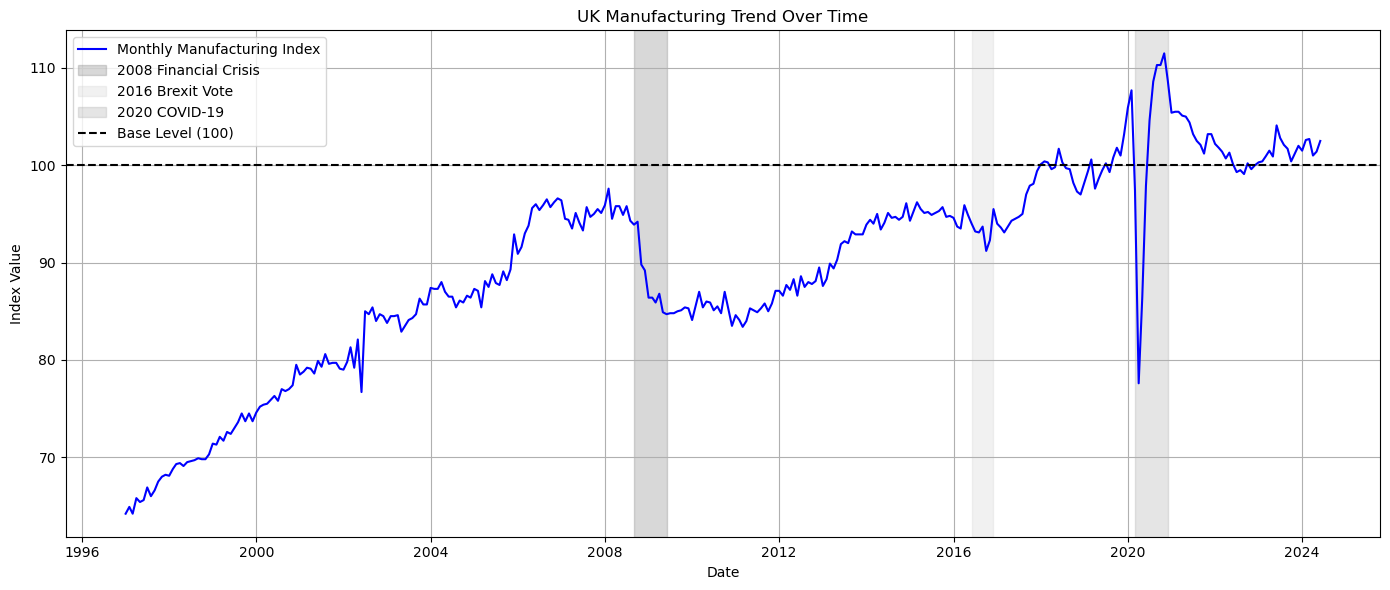

In [125]:
#analysing the trend of manufacturing sector

plt.figure(figsize=(14, 6))
plt.plot(uk_iop_cvm_data_clean['Manufacturing'], color='blue', label='Monthly Manufacturing Index')


plt.axvspan('2008-09-01', '2009-06-01', color='grey', alpha=0.3, label='2008 Financial Crisis')
plt.axvspan('2016-06-01', '2016-12-01', color='lightgrey', alpha=0.3, label='2016 Brexit Vote')
plt.axvspan('2020-03-01', '2020-12-01', color='darkgrey', alpha=0.3, label='2020 COVID-19')


plt.axhline(y=100, color='black', linestyle='--', linewidth=1.5, label='Base Level (100)')

plt.title('UK Manufacturing Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


1996–2007: Steady growth — strong industrial expansion.

2008–2009: Sharp drop during the Global Financial Crisis.

2016: Brexit vote — growth remains flat amid uncertainty.

2020: Huge dip & spike due to COVID-19 lockdowns and recovery.

2021–2024: Stabilized around 100–105 — reflecting cautious resilience.

In [126]:
us_ipi= pd.read_excel("US_Sectors_Merged.xlsx")
us_ipi

,date,manufacturing,mining,utilities,durable,nondurable
0,2007-01-01,103.2991,80.6948,98.0081,92.9120,123.4808
1,2007-02-01,103.6719,81.4645,104.0988,93.6388,124.2016
2,2007-03-01,104.5848,81.4511,99.2350,94.6999,125.4208
3,2007-04-01,105.2553,81.6686,100.8649,95.6740,125.8230
4,2007-05-01,105.2150,82.3006,101.0477,95.9826,125.6912
...,...,...,...,...,...,...
202,2023-11-01,99.8694,119.7738,105.5799,98.1839,103.1023
203,2023-12-01,99.8251,120.4936,103.0754,98.0376,103.7028
204,2024-01-01,98.4489,115.3018,107.4735,96.7920,101.2194
205,2024-02-01,99.8476,120.3005,103.5652,97.7226,103.8329


In [127]:
us_ipi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           207 non-null    datetime64[ns]
 1   manufacturing  207 non-null    float64       
 2   mining         207 non-null    float64       
 3   utilities      207 non-null    float64       
 4   durable        207 non-null    float64       
 5   nondurable     207 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.8 KB


In [133]:
uk_iop_cvm_data_clean.columns.tolist()

['Total_Industrial_Production',
 'Manufacturing',
 'Energy_Supply',
 'Water_Waste_Services',
 'Intermediate_Goods',
 'Capital_Goods',
 'Consumer_NonDurables',
 'Automotive_Manufacturing',
 'Pharma_Manufacturing',
 'Electricity_Gas_Steam']

In [182]:
uk_normalized = uk_iop_cvm_data_clean.copy()

In [183]:
uk_base_row = uk_normalized.loc[uk_normalized["Year"] == pd.to_datetime("2006-01-01")].iloc[0]
uk_base_row

Year                           2006-01-01 00:00:00
Total_Industrial_Production                  102.8
Manufacturing                                 90.9
Energy_Supply                                 98.5
Water_Waste_Services                         106.1
Intermediate_Goods                            86.8
Capital_Goods                                 89.8
Consumer_NonDurables                          97.6
Automotive_Manufacturing                      72.0
Pharma_Manufacturing                         125.1
Electricity_Gas_Steam                         98.5
Name: 108, dtype: object

In [184]:
for col in uk_normalized.columns:
    if col != "Year":
        uk_normalized[col] = uk_normalized[col] / uk_base_row[col] * 100

In [185]:
uk_normalized 

,Year,Total_Industrial_Production,Manufacturing,Energy_Supply,Water_Waste_Services,Intermediate_Goods,Capital_Goods,Consumer_NonDurables,Automotive_Manufacturing,Pharma_Manufacturing,Electricity_Gas_Steam
0,1997-01-01,79.571984,70.627063,86.395939,109.707823,85.829493,52.672606,77.151639,83.194444,67.865707,86.395939
1,1997-02-01,79.863813,71.397140,84.060914,110.273327,85.944700,53.229399,79.200820,82.222222,63.788969,84.060914
2,1997-03-01,78.696498,70.627063,79.695431,111.027333,85.253456,53.786192,76.127049,83.194444,62.270184,79.695431
3,1997-04-01,80.642023,72.387239,84.974619,113.289350,88.133641,54.899777,76.741803,85.555556,66.107114,84.974619
4,1997-05-01,80.350195,71.947195,87.512690,112.064090,86.520737,54.677060,77.561475,84.583333,65.787370,87.512690
...,...,...,...,...,...,...,...,...,...,...,...
325,2024-02-01,92.217899,112.871287,62.842640,95.004713,99.539171,121.158129,117.725410,189.305556,97.681855,62.842640
326,2024-03-01,92.412451,112.981298,63.248731,95.098963,99.884793,118.708241,120.696721,176.388889,112.789768,63.248731
327,2024-04-01,91.439689,111.111111,63.553299,96.889727,98.156682,118.819599,116.700820,175.138889,98.800959,63.553299
328,2024-05-01,91.731518,111.551155,64.263959,96.701225,98.271889,118.708241,118.032787,173.611111,101.998401,64.263959


In [186]:
uk_normalized = uk_normalized[uk_normalized["Year"] >= pd.to_datetime("2007-01-01")]

In [187]:
uk_normalized 

,Year,Total_Industrial_Production,Manufacturing,Energy_Supply,Water_Waste_Services,Intermediate_Goods,Capital_Goods,Consumer_NonDurables,Automotive_Manufacturing,Pharma_Manufacturing,Electricity_Gas_Steam
120,2007-01-01,102.140078,106.050605,104.060914,96.795476,100.115207,110.133630,107.786885,103.333333,115.427658,104.060914
121,2007-02-01,100.778210,103.960396,102.233503,98.114986,98.271889,108.129176,105.122951,100.277778,96.802558,102.233503
122,2007-03-01,100.486381,103.850385,101.421320,96.512724,99.078341,108.017817,103.073770,99.861111,97.761791,101.421320
123,2007-04-01,99.124514,102.860286,96.345178,96.418473,97.119816,107.349666,103.688525,101.805556,88.169464,96.345178
124,2007-05-01,101.167315,104.620462,102.131980,96.041470,97.926267,106.347439,109.528689,97.916667,110.551559,102.131980
...,...,...,...,...,...,...,...,...,...,...,...
325,2024-02-01,92.217899,112.871287,62.842640,95.004713,99.539171,121.158129,117.725410,189.305556,97.681855,62.842640
326,2024-03-01,92.412451,112.981298,63.248731,95.098963,99.884793,118.708241,120.696721,176.388889,112.789768,63.248731
327,2024-04-01,91.439689,111.111111,63.553299,96.889727,98.156682,118.819599,116.700820,175.138889,98.800959,63.553299
328,2024-05-01,91.731518,111.551155,64.263959,96.701225,98.271889,118.708241,118.032787,173.611111,101.998401,64.263959


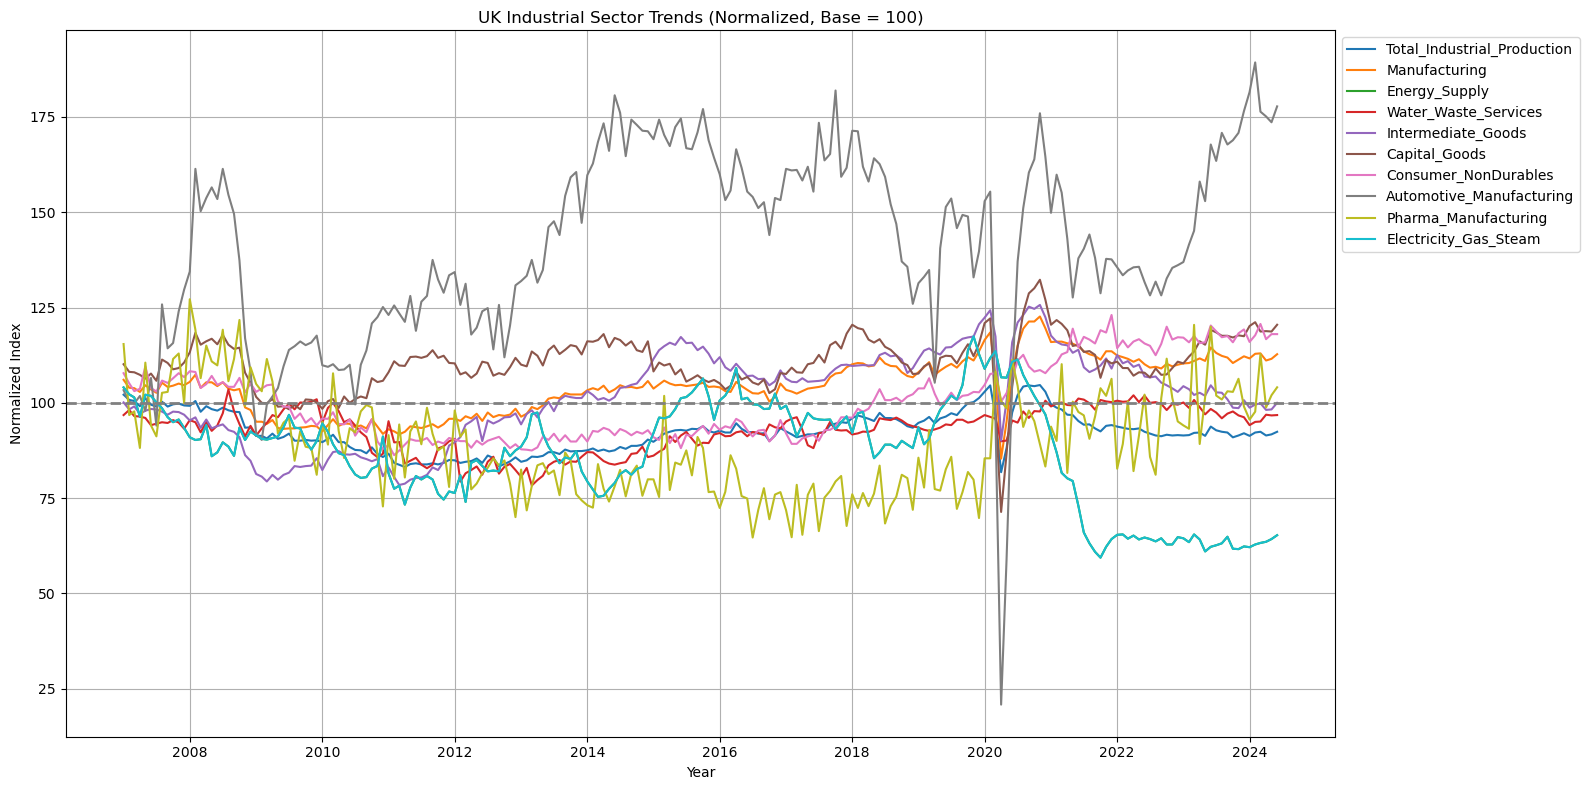

In [195]:
plt.figure(figsize=(16, 8))

for col in uk_normalized.columns:
    if col != 'Year':
        plt.plot(uk_normalized['Year'], uk_normalized[col], label=col)

plt.axhline(100, color='gray', linestyle='--', linewidth=2)
plt.title('UK Industrial Sector Trends (Normalized, Base = 100)')
plt.xlabel('Year')
plt.ylabel('Normalized Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

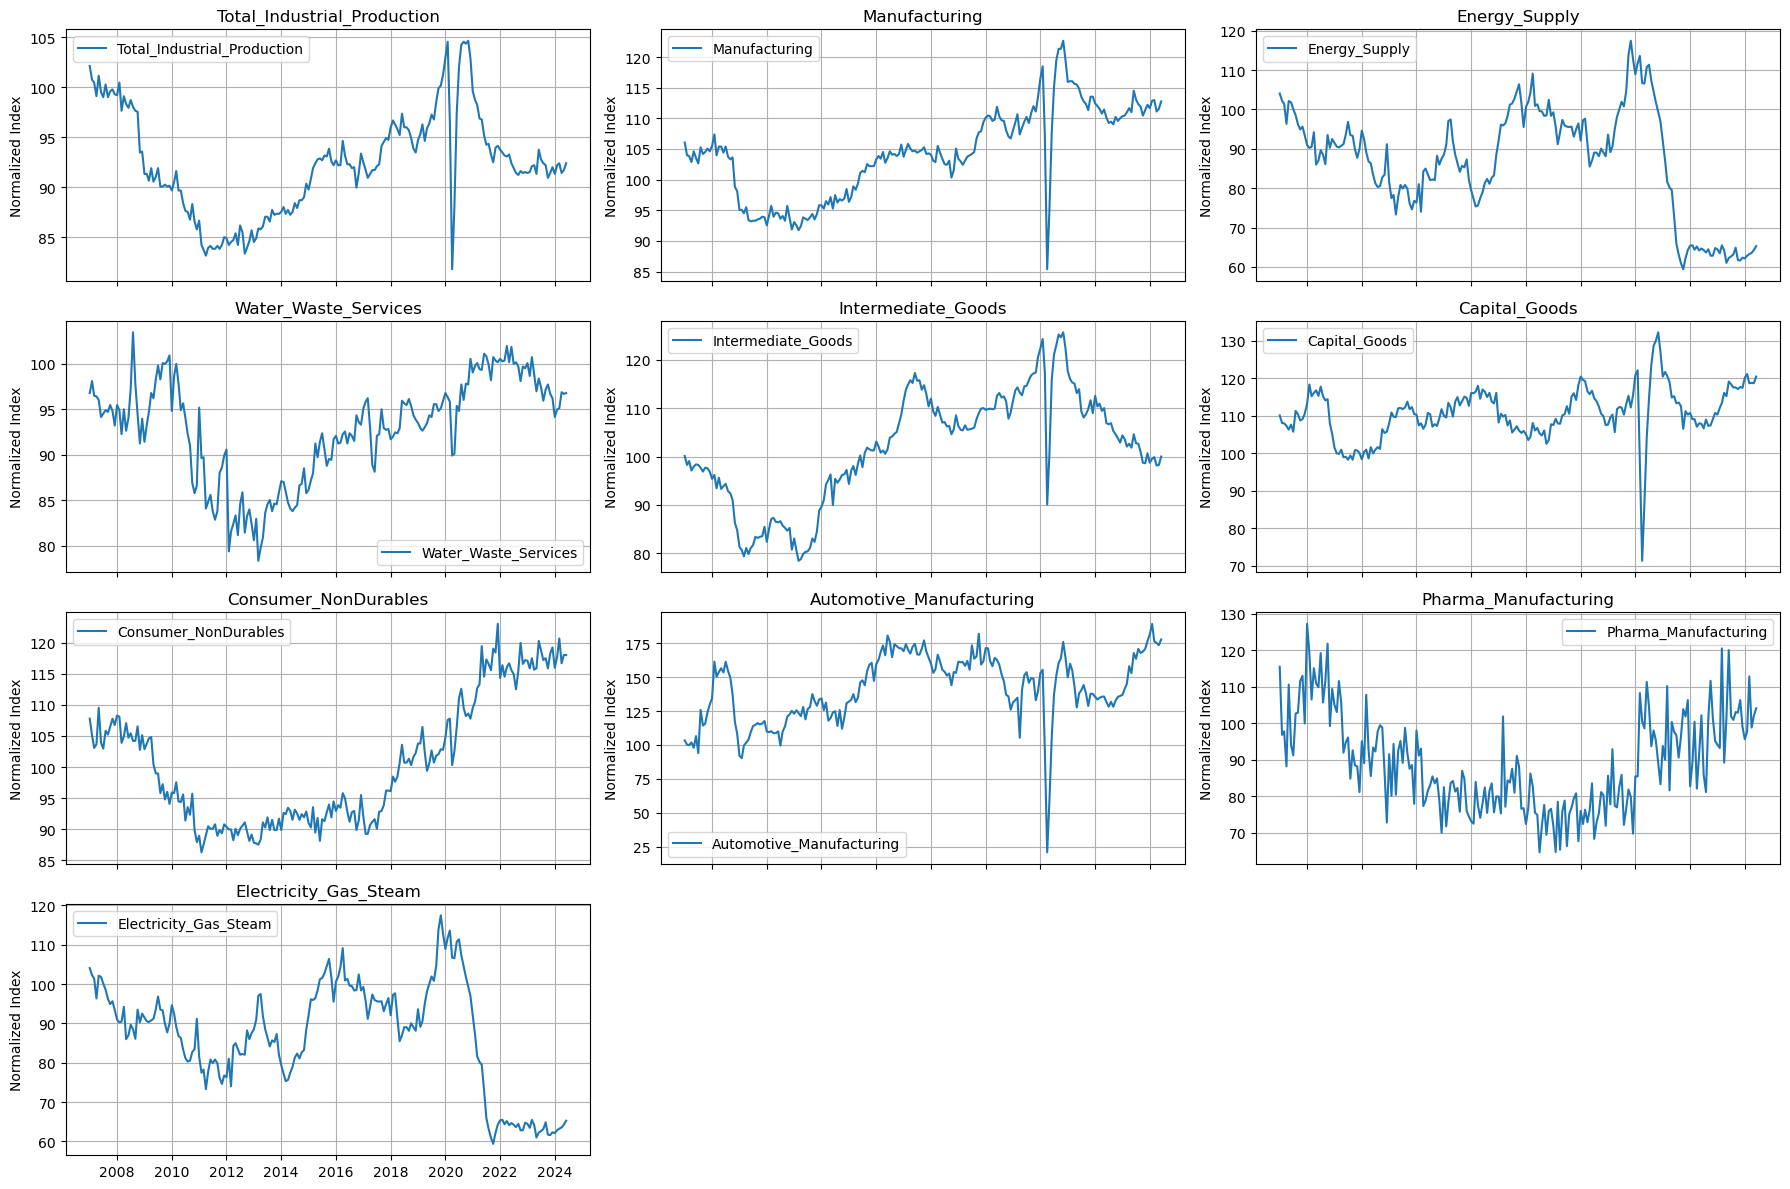

In [190]:
# List of columns to plot (excluding 'Year')
columns_to_plot = [col for col in uk_normalized.columns if col != 'Year']

# Set figure size based on number of plots
n_cols = 3  # Number of columns in subplot grid
n_rows = int(len(columns_to_plot) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3), sharex=True)
axes = axes.flatten()  # Flatten in case of single row

for i, col in enumerate(columns_to_plot):
    axes[i].plot(uk_normalized['Year'], uk_normalized[col], label=col)
    axes[i].set_title(col)
    axes[i].set_ylabel("Normalized Index")
    axes[i].grid(True)
    axes[i].legend()

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insights:
    capital goods in UK maret is significant as the ipi is consistantly more than 100

In [191]:
us_ipi

,date,manufacturing,mining,utilities,durable,nondurable
0,2007-01-01,103.2991,80.6948,98.0081,92.9120,123.4808
1,2007-02-01,103.6719,81.4645,104.0988,93.6388,124.2016
2,2007-03-01,104.5848,81.4511,99.2350,94.6999,125.4208
3,2007-04-01,105.2553,81.6686,100.8649,95.6740,125.8230
4,2007-05-01,105.2150,82.3006,101.0477,95.9826,125.6912
...,...,...,...,...,...,...
202,2023-11-01,99.8694,119.7738,105.5799,98.1839,103.1023
203,2023-12-01,99.8251,120.4936,103.0754,98.0376,103.7028
204,2024-01-01,98.4489,115.3018,107.4735,96.7920,101.2194
205,2024-02-01,99.8476,120.3005,103.5652,97.7226,103.8329


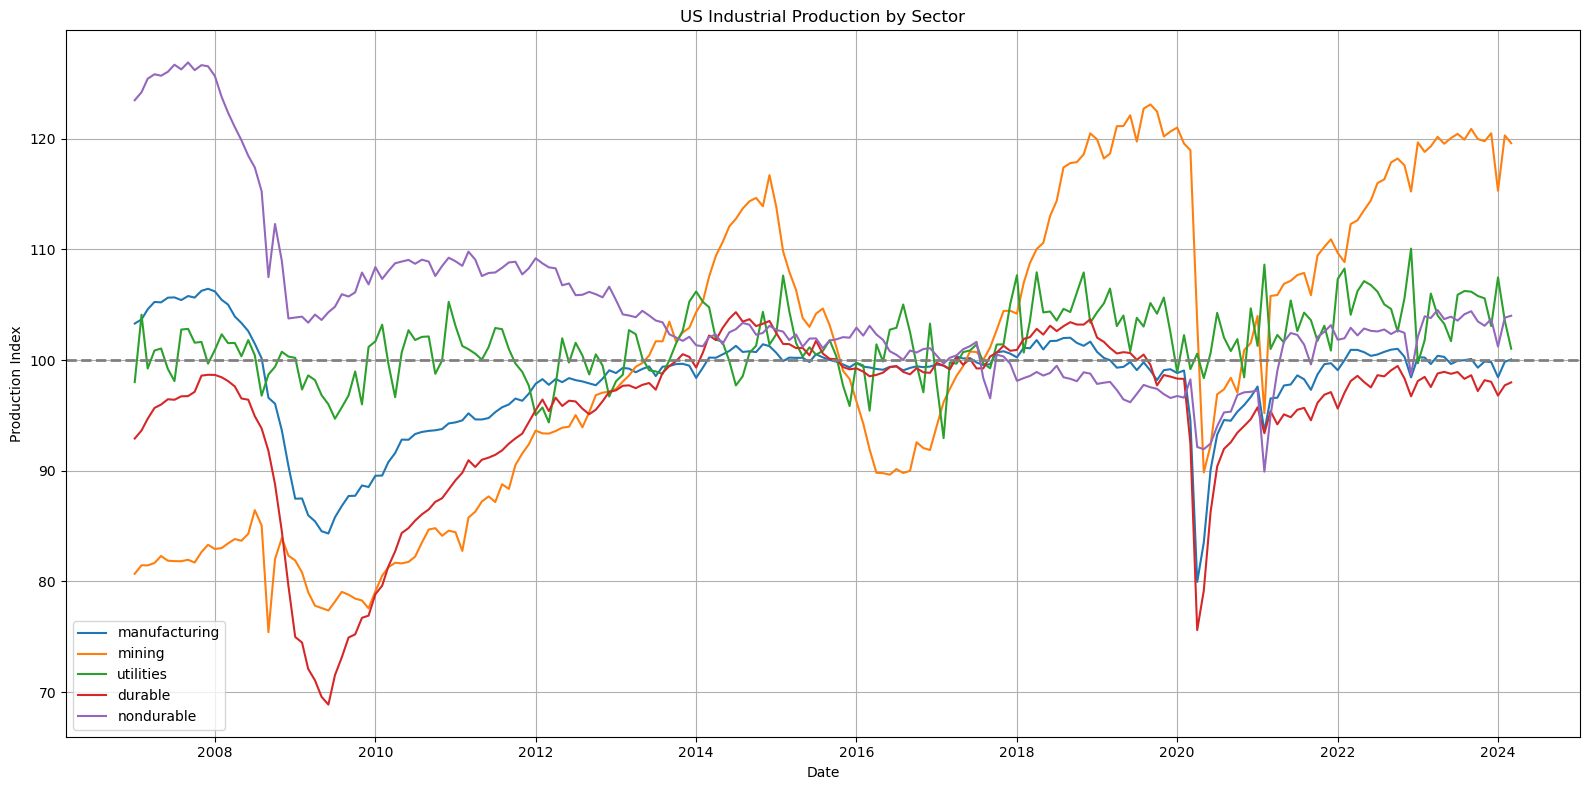

In [194]:
plt.figure(figsize=(16, 8))

columns_to_plot = ['manufacturing', 'mining', 'utilities', 'durable', 'nondurable']

for col in columns_to_plot:
    plt.plot(us_ipi["date"],us_ipi[col],label=col)
    
plt.axhline(100, color='gray', linestyle='--', linewidth=2)
plt.title("US Industrial Production by Sector")
plt.xlabel("Date")
plt.ylabel("Production Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [196]:
#oil crisis in 1973-74 (analysing data from 1972 to 78 to determine the effect and bounce back)

UKUS_IPI

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff
0,1948-01-01,28.22538,14.20549,1948-01,1948,NaN,NaN
1,1948-02-01,28.22538,14.23215,1948-02,1948,0.00000,0.02666
2,1948-03-01,28.22538,14.07226,1948-03,1948,0.00000,-0.15989
3,1948-04-01,28.12006,14.09893,1948-04,1948,-0.10532,0.02667
4,1948-05-01,28.22538,14.33881,1948-05,1948,0.10532,0.23988
...,...,...,...,...,...,...,...
910,2023-11-01,98.99947,102.00650,2023-11,2023,0.52659,0.33370
911,2023-12-01,99.63139,101.67880,2023-12,2023,0.63192,-0.32770
912,2024-01-01,99.10479,100.91000,2024-01,2024,-0.52660,-0.76880
913,2024-02-01,100.05270,101.73570,2024-02,2024,0.94791,0.82570


In [202]:
UKUS_IPI_oilcrash = UKUS_IPI[(UKUS_IPI["Year"] > 1971) & (UKUS_IPI["Year"] < 1979)]

UKUS_IPI_oilcrash

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff
288,1972-01-01,56.13481,39.73237,1972-01,1972,-1.57978,0.93001
289,1972-02-01,51.60611,40.13155,1972-02,1972,-4.52870,0.39918
290,1972-03-01,56.66140,40.41585,1972-03,1972,5.05529,0.28430
291,1972-04-01,58.13586,40.81642,1972-04,1972,1.47446,0.40057
292,1972-05-01,59.18905,40.81969,1972-05,1972,1.05319,0.00327
...,...,...,...,...,...,...,...
367,1978-08-01,67.19326,50.21088,1978-08,1978,0.42127,0.20489
368,1978-09-01,67.19326,50.32914,1978-09,1978,0.00000,0.11826
369,1978-10-01,65.92944,50.71821,1978-10,1978,-1.26382,0.38907
370,1978-11-01,66.35071,51.10808,1978-11,1978,0.42127,0.38987


In [204]:
#Yoy changes

yearly_avg= UKUS_IPI_oilcrash.groupby("Year")[["GBRPROINDMISMEI","USAPROINDMISMEI"]].mean().reset_index()
yearly_avg


,Year,GBRPROINDMISMEI,USAPROINDMISMEI
0,1972,58.715112,41.279466
1,1973,64.007372,44.664702
2,1974,62.734773,44.534391
3,1975,59.303142,40.566562
4,1976,61.277865,43.765703
5,1977,64.419872,47.112493
6,1978,66.254170,49.704432


In [205]:
yearly_avg["Yoy_change_uk"]= yearly_avg["GBRPROINDMISMEI"].pct_change()*100
yearly_avg["Yoy_change_us"]= yearly_avg["USAPROINDMISMEI"].pct_change()*100
yearly_avg

,Year,GBRPROINDMISMEI,USAPROINDMISMEI,Yoy_change_uk,Yoy_change_us
0,1972,58.715112,41.279466,NaN,NaN
1,1973,64.007372,44.664702,9.013453,8.200774
2,1974,62.734773,44.534391,-1.988206,-0.291754
3,1975,59.303142,40.566562,-5.470063,-8.909584
4,1976,61.277865,43.765703,3.329880,7.886154
5,1977,64.419872,47.112493,5.127475,7.647059
6,1978,66.254170,49.704432,2.847409,5.501598


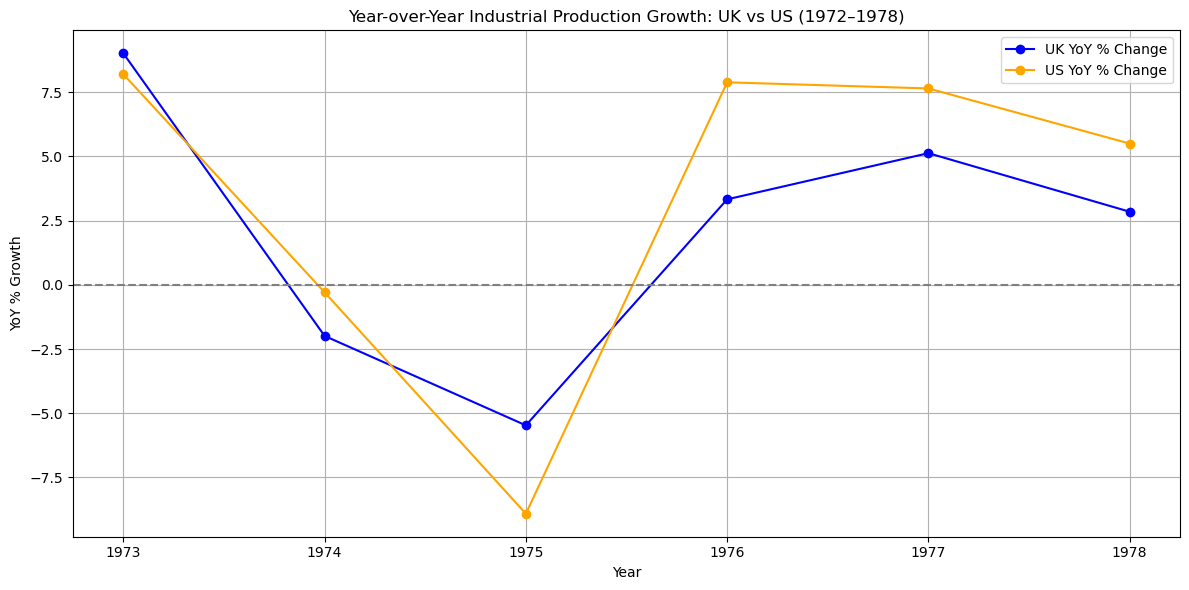

In [207]:
plt.figure(figsize=(12, 6))

# Plot UK YoY
plt.plot(yearly_avg["Year"], yearly_avg["Yoy_change_uk"], label="UK YoY % Change", marker='o', color='blue')

# Plot US YoY
plt.plot(yearly_avg["Year"], yearly_avg["Yoy_change_us"], label="US YoY % Change", marker='o', color='orange')

# Horizontal line at 0% for reference
plt.axhline(0, linestyle='--', color='gray')

# Labels and styling
plt.title("Year-over-Year Industrial Production Growth: UK vs US (1972–1978)")
plt.xlabel("Year")
plt.ylabel("YoY % Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#We see that the oil crisis hit both the countries and Europe started seeing the effect a little ealier , US drop was steep in 1975

#US rebound was good as it bounced from -9% to +7% in the next year compared to how UK  responded

#US showed faster and strong rebound from the crisis compared to UK

In [212]:
#2nd oil crisis in 1980-82

UKUS_IPI_oilcrash2 = UKUS_IPI[(UKUS_IPI["Year"] > 1976) & (UKUS_IPI["Year"] < 1986)]

UKUS_IPI_oilcrash2

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff
348,1977-01-01,64.98157,45.03268,1977-01,1977,1.15851,-0.31017
349,1977-02-01,64.77094,45.74303,1977-02,1977,-0.21063,0.71035
350,1977-03-01,64.77094,46.32342,1977-03,1977,0.00000,0.58039
351,1977-04-01,64.24434,46.77603,1977-04,1977,-0.52660,0.45261
352,1977-05-01,65.92944,47.13685,1977-05,1977,1.68510,0.36082
...,...,...,...,...,...,...,...
451,1985-08-01,69.72091,54.14215,1985-08,1985,0.63191,0.17931
452,1985-09-01,70.87941,54.34140,1985-09,1985,1.15850,0.19925
453,1985-10-01,69.51027,54.15346,1985-10,1985,-1.36914,-0.18794
454,1985-11-01,70.24750,54.33902,1985-11,1985,0.73723,0.18556


In [213]:
yearly_avg2= UKUS_IPI_oilcrash2.groupby("Year")[["GBRPROINDMISMEI","USAPROINDMISMEI"]].mean().reset_index()
yearly_avg2

,Year,GBRPROINDMISMEI,USAPROINDMISMEI
0,1977,64.419872,47.112493
1,1978,66.254170,49.704432
2,1979,68.825699,51.192502
3,1980,64.323327,49.867413
4,1981,62.278391,50.522758
5,1982,63.472002,47.904006
6,1983,65.780234,49.214332
7,1984,65.806565,53.601470
8,1985,69.448835,54.257904


In [214]:
yearly_avg2["Yoy_change_uk"]= yearly_avg2["GBRPROINDMISMEI"].pct_change()*100
yearly_avg2["Yoy_change_us"]= yearly_avg2["USAPROINDMISMEI"].pct_change()*100
yearly_avg2

,Year,GBRPROINDMISMEI,USAPROINDMISMEI,Yoy_change_uk,Yoy_change_us
0,1977,64.419872,47.112493,NaN,NaN
1,1978,66.254170,49.704432,2.847409,5.501598
2,1979,68.825699,51.192502,3.881309,2.993836
3,1980,64.323327,49.867413,-6.541703,-2.588442
4,1981,62.278391,50.522758,-3.179151,1.314175
5,1982,63.472002,47.904006,1.916574,-5.183313
6,1983,65.780234,49.214332,3.636614,2.735318
7,1984,65.806565,53.601470,0.040028,8.914349
8,1985,69.448835,54.257904,5.534813,1.224657


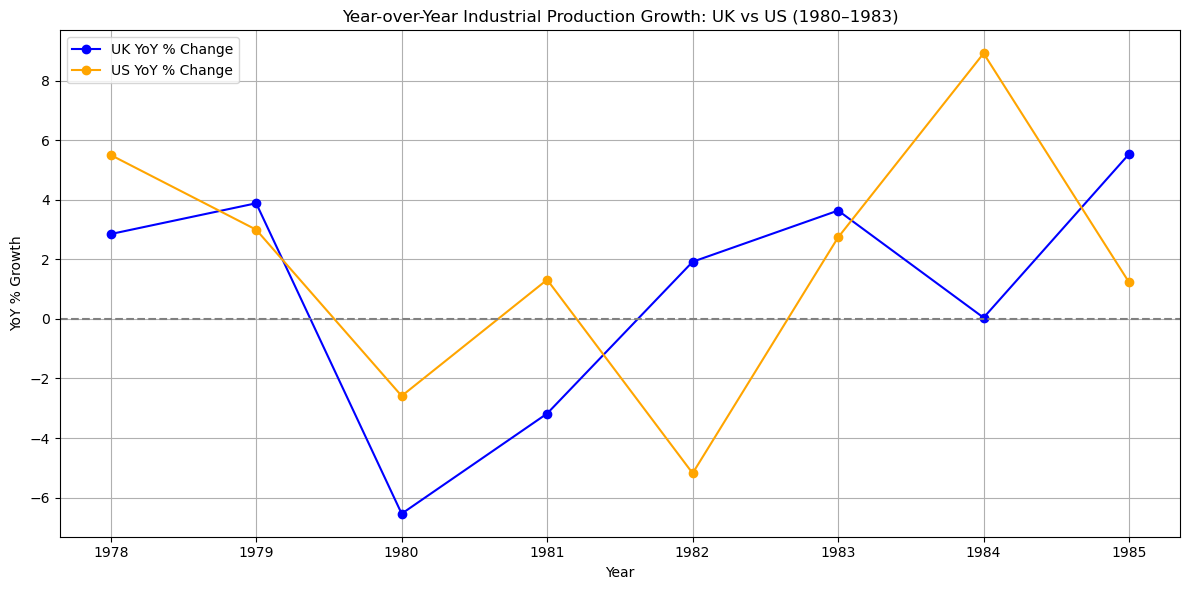

In [215]:
plt.figure(figsize=(12, 6))

# Plot UK YoY
plt.plot(yearly_avg2["Year"], yearly_avg2["Yoy_change_uk"], label="UK YoY % Change", marker='o', color='blue')

# Plot US YoY
plt.plot(yearly_avg2["Year"], yearly_avg2["Yoy_change_us"], label="US YoY % Change", marker='o', color='orange')

# Horizontal line at 0% for reference
plt.axhline(0, linestyle='--', color='gray')

# Labels and styling
plt.title("Year-over-Year Industrial Production Growth: UK vs US (1980–1983)")
plt.xlabel("Year")
plt.ylabel("YoY % Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#oil crisis from 1980 to 82 for UK and  Volcker Recession + Oil Shock Impact for US 

#UK started regaining slowly after 1980 but us also fought recession and so the recovery started in 1983 and we can see US bouncing back

#UK showed gradual recovery

#US started recovering in 82 but bounced back in 1984 from 2.7% +8.9%

In [217]:
#global recession from 2008 to 2009

UKUS_IPI_recession = UKUS_IPI[(UKUS_IPI["Year"] > 2004) & (UKUS_IPI["Year"] < 2013)]

UKUS_IPI_recession 


,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff
684,2005-01-01,105.63450,95.04601,2005-01,2005,0.63190,0.33753
685,2005-02-01,105.21330,95.71858,2005-02,2005,-0.42120,0.67257
686,2005-03-01,103.52820,95.59517,2005-03,2005,-1.68510,-0.12341
687,2005-04-01,106.26650,95.78440,2005-04,2005,2.73830,0.18923
688,2005-05-01,105.63450,95.88611,2005-05,2005,-0.63200,0.10171
...,...,...,...,...,...,...,...
775,2012-08-01,92.57504,96.45658,2012-08,2012,-0.73723,-0.38273
776,2012-09-01,90.25803,96.38937,2012-09,2012,-2.31701,-0.06721
777,2012-10-01,90.88994,96.69092,2012-10,2012,0.63191,0.30155
778,2012-11-01,91.62717,97.07900,2012-11,2012,0.73723,0.38808


In [218]:
yearly_avg3= UKUS_IPI_recession.groupby("Year")[["GBRPROINDMISMEI","USAPROINDMISMEI"]].mean().reset_index()
yearly_avg3

,Year,GBRPROINDMISMEI,USAPROINDMISMEI
0,2005,105.739867,95.870058
1,2006,110.075467,98.058796
2,2007,108.293833,100.570391
3,2008,105.731092,97.086579
4,2009,98.297352,86.051292
5,2010,95.848693,90.821413
6,2011,91.205896,93.678427
7,2012,91.793925,96.537576


In [219]:
yearly_avg3["Yoy_change_uk"]= yearly_avg3["GBRPROINDMISMEI"].pct_change()*100
yearly_avg3["Yoy_change_us"]= yearly_avg3["USAPROINDMISMEI"].pct_change()*100
yearly_avg3

,Year,GBRPROINDMISMEI,USAPROINDMISMEI,Yoy_change_uk,Yoy_change_us
0,2005,105.739867,95.870058,NaN,NaN
1,2006,110.075467,98.058796,4.100251,2.283025
2,2007,108.293833,100.570391,-1.618556,2.561315
3,2008,105.731092,97.086579,-2.366471,-3.464053
4,2009,98.297352,86.051292,-7.030798,-11.366440
5,2010,95.848693,90.821413,-2.491073,5.543347
6,2011,91.205896,93.678427,-4.843882,3.145749
7,2012,91.793925,96.537576,0.644727,3.052089


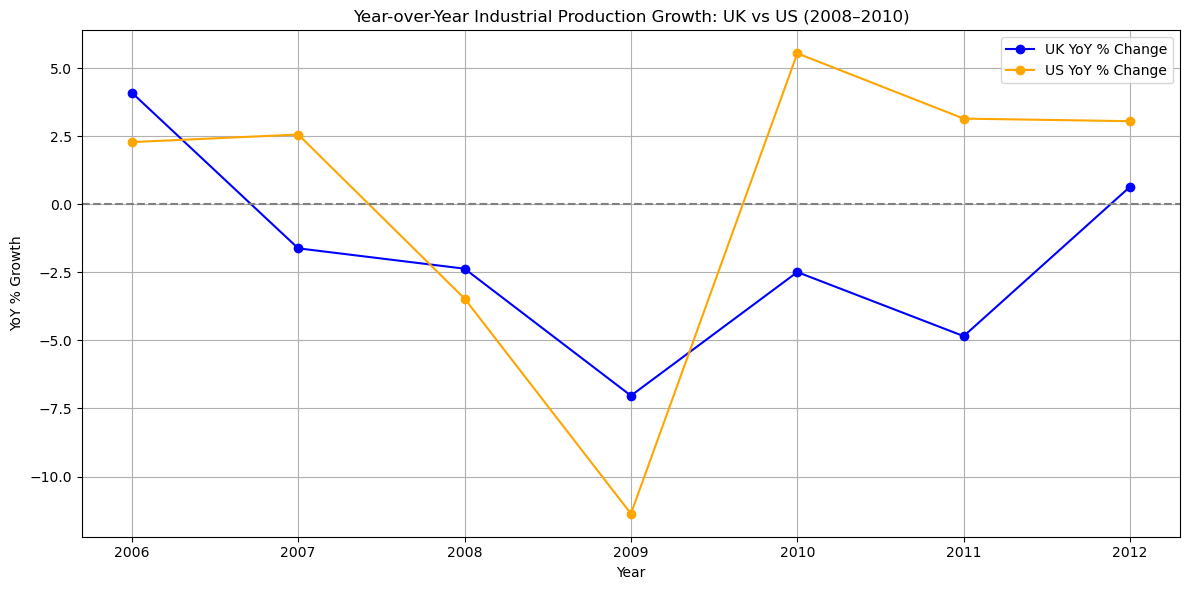

In [220]:
plt.figure(figsize=(12, 6))

# Plot UK YoY
plt.plot(yearly_avg3["Year"], yearly_avg3["Yoy_change_uk"], label="UK YoY % Change", marker='o', color='blue')

# Plot US YoY
plt.plot(yearly_avg3["Year"], yearly_avg3["Yoy_change_us"], label="US YoY % Change", marker='o', color='orange')

# Horizontal line at 0% for reference
plt.axhline(0, linestyle='--', color='gray')

# Labels and styling
plt.title("Year-over-Year Industrial Production Growth: UK vs US (2008–2010)")
plt.xlabel("Year")
plt.ylabel("YoY % Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#UK IPI started dropping gradually from -1% to -2% to -5% from 2007 to 2009 but we see a steep decline in us ipi from -3.4 to -11.3% in 2009

#US also showed a strong recovery but the UK couldn't bounce back quickly

In [237]:
#covid 2022-2024

UKUS_IPI_covid = UKUS_IPI[(UKUS_IPI["Year"] > 2017) & (UKUS_IPI["Year"] < 2025)]

UKUS_IPI_covid 

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff
840,2018-01-01,103.94940,100.5087,2018-01,2018,1.36910,-0.0628
841,2018-02-01,104.68670,100.8772,2018-02,2018,0.73730,0.3685
842,2018-03-01,104.26540,101.3515,2018-03,2018,-0.42130,0.4743
843,2018-04-01,103.73880,102.4445,2018-04,2018,-0.52660,1.0930
844,2018-05-01,103.10690,101.4972,2018-05,2018,-0.63190,-0.9473
...,...,...,...,...,...,...,...
910,2023-11-01,98.99947,102.0065,2023-11,2023,0.52659,0.3337
911,2023-12-01,99.63139,101.6788,2023-12,2023,0.63192,-0.3277
912,2024-01-01,99.10479,100.9100,2024-01,2024,-0.52660,-0.7688
913,2024-02-01,100.05270,101.7357,2024-02,2024,0.94791,0.8257


In [235]:
UKUS_IPI_covid["mom_change_uk"]= UKUS_IPI_covid["GBRPROINDMISMEI"].pct_change()*100
UKUS_IPI_covid["mom_change_us"]= UKUS_IPI_covid["USAPROINDMISMEI"].pct_change()*100
UKUS_IPI_covid

C:\Users\aksha\AppData\Local\Temp\ipykernel_19204\3749552770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKUS_IPI_covid["mom_change_uk"]= UKUS_IPI_covid["GBRPROINDMISMEI"].pct_change()*100
C:\Users\aksha\AppData\Local\Temp\ipykernel_19204\3749552770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKUS_IPI_covid["mom_change_us"]= UKUS_IPI_covid["USAPROINDMISMEI"].pct_change()*100


,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff,mom_change_uk,mom_change_us
840,2018-01-01,103.94940,100.5087,2018-01,2018,1.36910,-0.0628,NaN,NaN
841,2018-02-01,104.68670,100.8772,2018-02,2018,0.73730,0.3685,0.709287,0.366635
842,2018-03-01,104.26540,101.3515,2018-03,2018,-0.42130,0.4743,-0.402439,0.470176
843,2018-04-01,103.73880,102.4445,2018-04,2018,-0.52660,1.0930,-0.505057,1.078425
844,2018-05-01,103.10690,101.4972,2018-05,2018,-0.63190,-0.9473,-0.609126,-0.924696
...,...,...,...,...,...,...,...,...,...
910,2023-11-01,98.99947,102.0065,2023-11,2023,0.52659,0.3337,0.534756,0.328210
911,2023-12-01,99.63139,101.6788,2023-12,2023,0.63192,-0.3277,0.638306,-0.321254
912,2024-01-01,99.10479,100.9100,2024-01,2024,-0.52660,-0.7688,-0.528548,-0.756106
913,2024-02-01,100.05270,101.7357,2024-02,2024,0.94791,0.8257,0.956472,0.818254


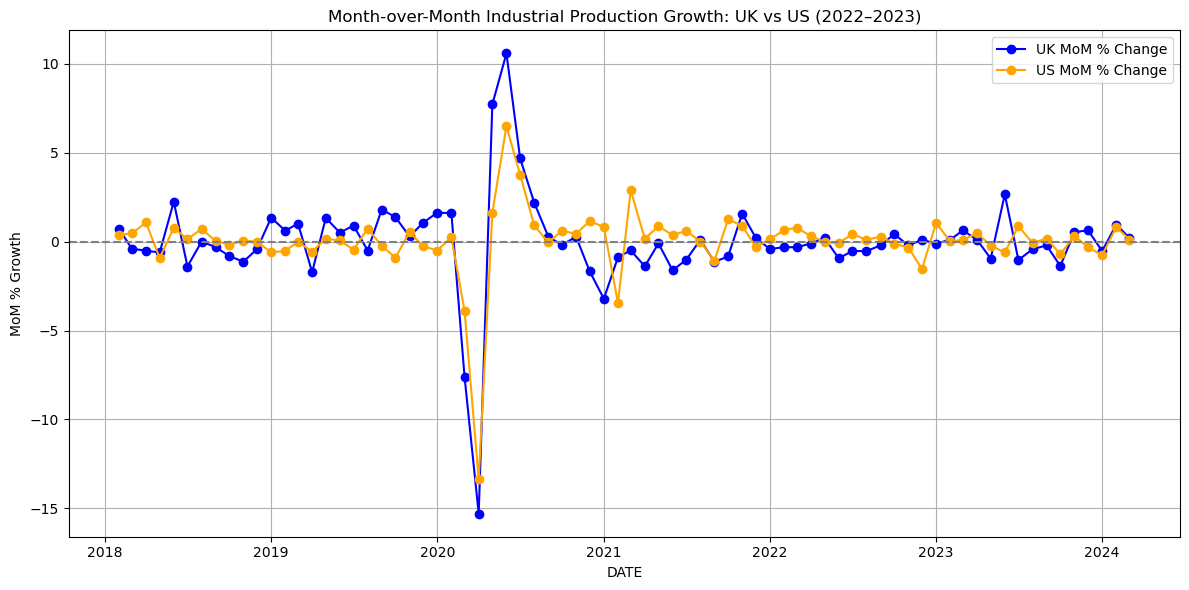

In [236]:
plt.figure(figsize=(12, 6))

# Plot UK YoY
plt.plot(UKUS_IPI_covid["DATE"], UKUS_IPI_covid["mom_change_uk"], label="UK MoM % Change", marker='o', color='blue')

# Plot US YoY
plt.plot(UKUS_IPI_covid["DATE"],UKUS_IPI_covid["mom_change_us"], label="US MoM % Change", marker='o', color='orange')

# Horizontal line at 0% for reference
plt.axhline(0, linestyle='--', color='gray')

# Labels and styling
plt.title("Month-over-Month Industrial Production Growth: UK vs US (2022–2023)")
plt.xlabel("DATE")
plt.ylabel("MoM % Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#From 2018 the growth rate is almost same over the months for UK and US

#Both were equally affected and bounced back in june 



In [238]:
# from the earlier UK US IPI Trend we observe that 2008 recovery was very significant as we saw US Coming very close and almost beating the UK market

#lets analyse from 2008 till 2024 and see how the IPIs of both the countries look like 

In [239]:
UKUS_IPI_post2008 = UKUS_IPI[(UKUS_IPI["Year"] > 2006) & (UKUS_IPI["Year"] < 2025)]

UKUS_IPI_post2008

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff
708,2007-01-01,110.58450,98.88618,2007-01,2007,0.42130,-0.35200
709,2007-02-01,109.11010,99.84811,2007-02,2007,-1.47440,0.96193
710,2007-03-01,108.79410,100.02140,2007-03,2007,-0.31600,0.17329
711,2007-04-01,107.31960,100.70050,2007-04,2007,-1.47450,0.67910
712,2007-05-01,109.53130,100.74260,2007-05,2007,2.21170,0.04210
...,...,...,...,...,...,...,...
910,2023-11-01,98.99947,102.00650,2023-11,2023,0.52659,0.33370
911,2023-12-01,99.63139,101.67880,2023-12,2023,0.63192,-0.32770
912,2024-01-01,99.10479,100.91000,2024-01,2024,-0.52660,-0.76880
913,2024-02-01,100.05270,101.73570,2024-02,2024,0.94791,0.82570


In [240]:
UKUS_IPI_post2008["mom_change_uk"]= UKUS_IPI_post2008["GBRPROINDMISMEI"].pct_change()*100
UKUS_IPI_post2008["mom_change_us"]= UKUS_IPI_post2008["USAPROINDMISMEI"].pct_change()*100
UKUS_IPI_post2008

C:\Users\aksha\AppData\Local\Temp\ipykernel_19204\501807819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKUS_IPI_post2008["mom_change_uk"]= UKUS_IPI_post2008["GBRPROINDMISMEI"].pct_change()*100
C:\Users\aksha\AppData\Local\Temp\ipykernel_19204\501807819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UKUS_IPI_post2008["mom_change_us"]= UKUS_IPI_post2008["USAPROINDMISMEI"].pct_change()*100


,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff,mom_change_uk,mom_change_us
708,2007-01-01,110.58450,98.88618,2007-01,2007,0.42130,-0.35200,NaN,NaN
709,2007-02-01,109.11010,99.84811,2007-02,2007,-1.47440,0.96193,-1.333279,0.972765
710,2007-03-01,108.79410,100.02140,2007-03,2007,-0.31600,0.17329,-0.289616,0.173554
711,2007-04-01,107.31960,100.70050,2007-04,2007,-1.47450,0.67910,-1.355312,0.678955
712,2007-05-01,109.53130,100.74260,2007-05,2007,2.21170,0.04210,2.060854,0.041807
...,...,...,...,...,...,...,...,...,...
910,2023-11-01,98.99947,102.00650,2023-11,2023,0.52659,0.33370,0.534756,0.328210
911,2023-12-01,99.63139,101.67880,2023-12,2023,0.63192,-0.32770,0.638306,-0.321254
912,2024-01-01,99.10479,100.91000,2024-01,2024,-0.52660,-0.76880,-0.528548,-0.756106
913,2024-02-01,100.05270,101.73570,2024-02,2024,0.94791,0.82570,0.956472,0.818254


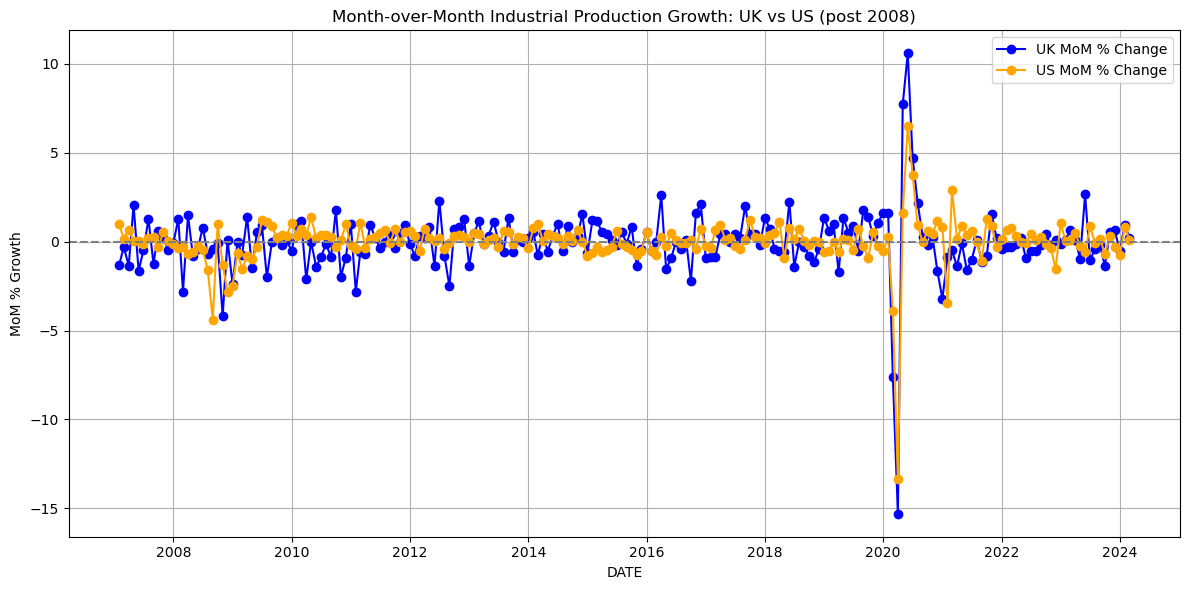

In [241]:
plt.figure(figsize=(12, 6))

# Plot UK YoY
plt.plot(UKUS_IPI_post2008["DATE"], UKUS_IPI_post2008["mom_change_uk"], label="UK MoM % Change", marker='o', color='blue')

# Plot US YoY
plt.plot(UKUS_IPI_post2008["DATE"],UKUS_IPI_post2008["mom_change_us"], label="US MoM % Change", marker='o', color='orange')

# Horizontal line at 0% for reference
plt.axhline(0, linestyle='--', color='gray')

# Labels and styling
plt.title("Month-over-Month Industrial Production Growth: UK vs US (post 2008)")
plt.xlabel("DATE")
plt.ylabel("MoM % Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [242]:
#forcasting just based on this data from 2007

In [245]:
uk_sarima_2008= SARIMAX(UKUS_IPI_post2008["GBRPROINDMISMEI"],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
uk_sarima_fit_2008= uk_sarima_2008.fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [246]:
us_sarima_2008= SARIMAX(UKUS_IPI_post2008["USAPROINDMISMEI"],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
us_sarima_fit_2008= us_sarima_2008.fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [247]:
uk_sarima_forecast_2008 = uk_sarima_fit_2008.forecast(steps=120)
us_sarima_forecast_2008 = us_sarima_fit_2008.forecast(steps=120)

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


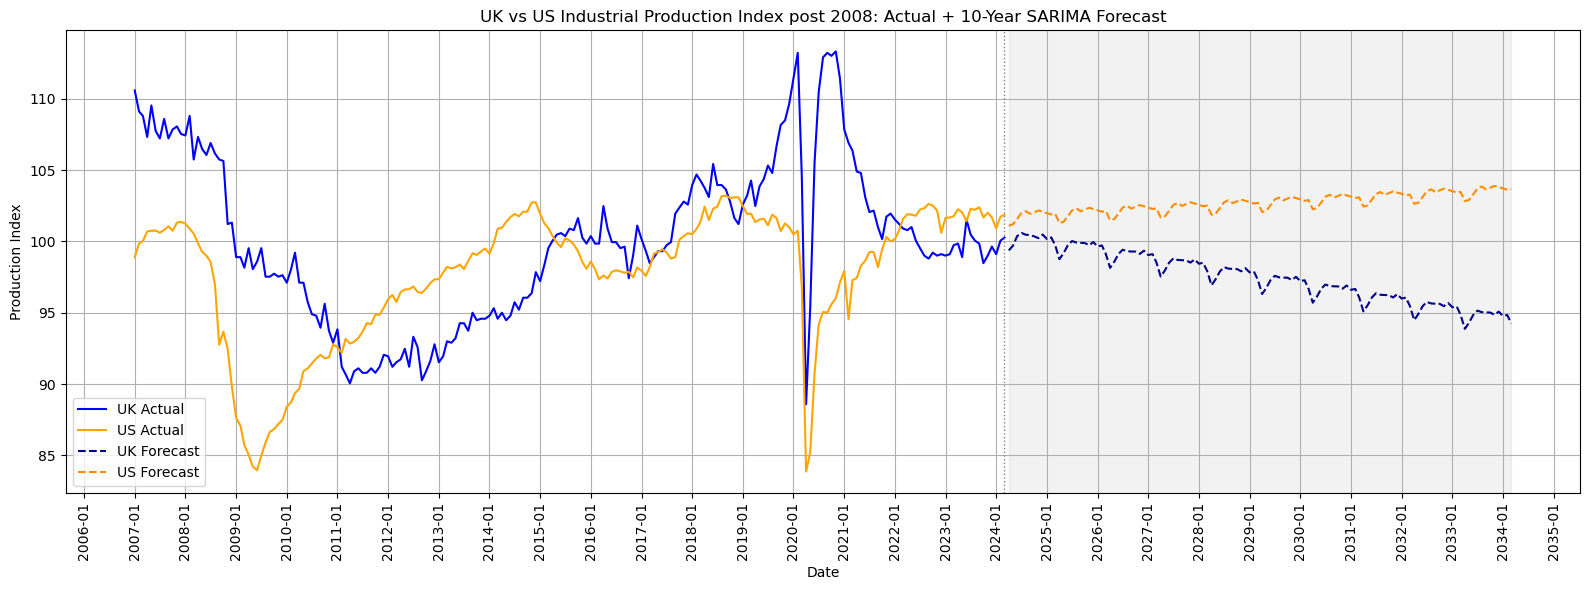

In [249]:
import matplotlib.dates as mdates


# Step 1: Create future dates for 120-month forecast
last_date = UKUS_IPI_post2008['DATE'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=120, freq='MS')

# Step 2: Assign future dates as index to SARIMA forecasts
uk_forecast_2008 = pd.Series(uk_sarima_forecast_2008.values, index=future_dates)
us_forecast_2008 = pd.Series(us_sarima_forecast_2008.values, index=future_dates)

# Step 3: Plot
plt.figure(figsize=(16, 6))

# Actual data
plt.plot(UKUS_IPI_post2008['DATE'], UKUS_IPI_post2008['GBRPROINDMISMEI'], label='UK Actual', color='blue')     # fixed line
plt.plot(UKUS_IPI_post2008['DATE'], UKUS_IPI_post2008['USAPROINDMISMEI'], label='US Actual', color='orange')

# Forecast data (dashed lines)
plt.plot(uk_forecast_2008.index, uk_forecast_2008, label='UK Forecast', linestyle='--', color='darkblue')
plt.plot(us_forecast_2008.index, us_forecast_2008, label='US Forecast', linestyle='--', color='darkorange')

# Optional: vertical line where forecast begins
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=1)

# Optional: shaded region for forecast
plt.axvspan(future_dates[0], future_dates[-1], color='gray', alpha=0.1)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

plt.title("UK vs US Industrial Production Index post 2008: Actual + 10-Year SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Production Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#strongly suggests US is going to lead in the next decade. 

In [250]:
#lets analyze who is growing faster by normalization 

UKUS_IPI_growth = UKUS_IPI[UKUS_IPI["DATE"] >= "2007-01-01"].copy()

In [251]:
uk_base_nor = UKUS_IPI_growth[UKUS_IPI_growth["DATE"] == "2007-01-01"]["GBRPROINDMISMEI"].values[0]
us_base_nor = UKUS_IPI_growth[UKUS_IPI_growth["DATE"] == "2007-01-01"]["USAPROINDMISMEI"].values[0]

In [252]:
UKUS_IPI_growth["UK_Norm"] = UKUS_IPI_growth["GBRPROINDMISMEI"] / uk_base_nor * 100
UKUS_IPI_growth["US_Norm"] = UKUS_IPI_growth["USAPROINDMISMEI"] / us_base_nor * 100

In [253]:
UKUS_IPI_growth

,DATE,GBRPROINDMISMEI,USAPROINDMISMEI,YearMonth,Year,GBRPROINDMISMEI_diff,USAPROINDMISMEI_diff,UK_Norm,US_Norm
708,2007-01-01,110.58450,98.88618,2007-01,2007,0.42130,-0.35200,100.000000,100.000000
709,2007-02-01,109.11010,99.84811,2007-02,2007,-1.47440,0.96193,98.666721,100.972765
710,2007-03-01,108.79410,100.02140,2007-03,2007,-0.31600,0.17329,98.380967,101.148007
711,2007-04-01,107.31960,100.70050,2007-04,2007,-1.47450,0.67910,97.047597,101.834756
712,2007-05-01,109.53130,100.74260,2007-05,2007,2.21170,0.04210,99.047606,101.877330
...,...,...,...,...,...,...,...,...,...
910,2023-11-01,98.99947,102.00650,2023-11,2023,0.52659,0.33370,89.523821,103.155466
911,2023-12-01,99.63139,101.67880,2023-12,2023,0.63192,-0.32770,90.095257,102.824075
912,2024-01-01,99.10479,100.91000,2024-01,2024,-0.52660,-0.76880,89.619061,102.046616
913,2024-02-01,100.05270,101.73570,2024-02,2024,0.94791,0.82570,90.476242,102.881616


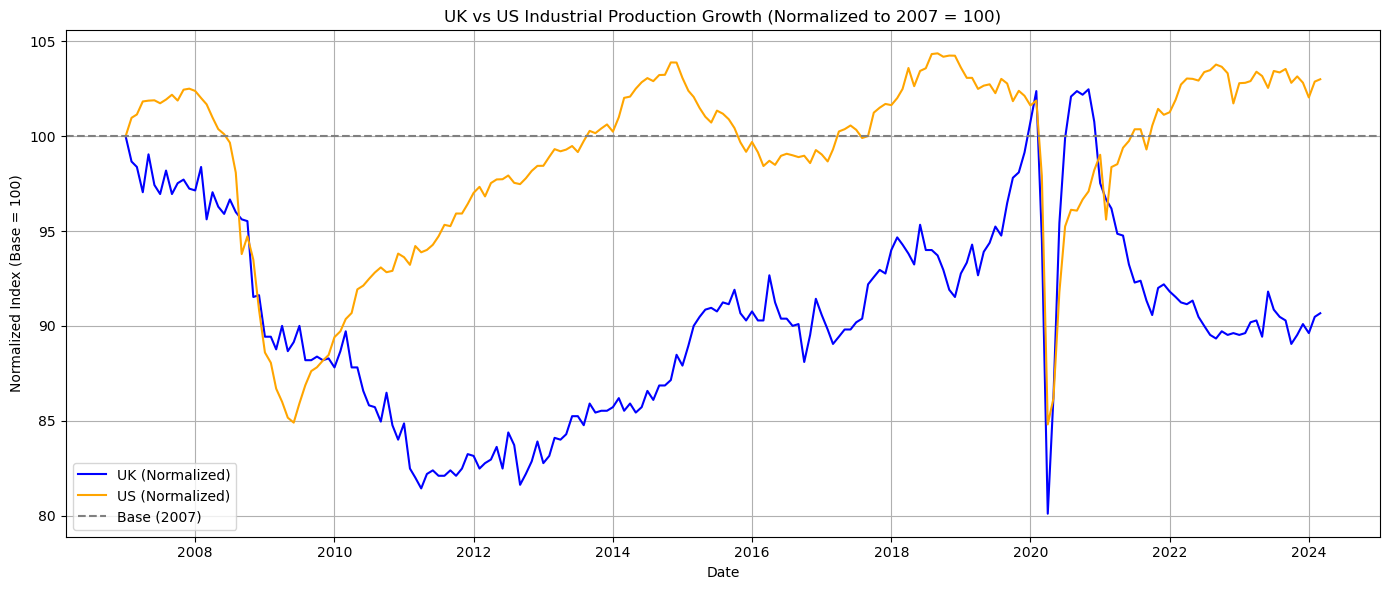

In [254]:
plt.figure(figsize=(14,6))
plt.plot(UKUS_IPI_growth["DATE"], UKUS_IPI_growth["UK_Norm"], label="UK (Normalized)", color='blue')
plt.plot(UKUS_IPI_growth["DATE"], UKUS_IPI_growth["US_Norm"], label="US (Normalized)", color='orange')
plt.axhline(100, linestyle='--', color='gray', label="Base (2007)")
plt.title("UK vs US Industrial Production Growth (Normalized to 2007 = 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Index (Base = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Represents % change from 2007=100
#above 100 is a positive growth and below 100 is decline

#US shows consistent growth apart from the 2008 - 09 crisis, also covid crisis and the recovery period, the growth is above the base 
#UK shows no grows, though they were always ahead than UK, the growth is significantly declining
#post covide though it bounced back, we see the growth declining from there and almost below 100 for all the years.

In [255]:
# uk and the automotive manufacturing
uk_iop_cvm_data_clean


,Year,Total_Industrial_Production,Manufacturing,Energy_Supply,Water_Waste_Services,Intermediate_Goods,Capital_Goods,Consumer_NonDurables,Automotive_Manufacturing,Pharma_Manufacturing,Electricity_Gas_Steam
0,1997-01-01,81.8,64.2,85.1,116.4,74.5,47.3,75.3,59.9,84.9,85.1
1,1997-02-01,82.1,64.9,82.8,117.0,74.6,47.8,77.3,59.2,79.8,82.8
2,1997-03-01,80.9,64.2,78.5,117.8,74.0,48.3,74.3,59.9,77.9,78.5
3,1997-04-01,82.9,65.8,83.7,120.2,76.5,49.3,74.9,61.6,82.7,83.7
4,1997-05-01,82.6,65.4,86.2,118.9,75.1,49.1,75.7,60.9,82.3,86.2
...,...,...,...,...,...,...,...,...,...,...,...
325,2024-02-01,94.8,102.6,61.9,100.8,86.4,108.8,114.9,136.3,122.2,61.9
326,2024-03-01,95.0,102.7,62.3,100.9,86.7,106.6,117.8,127.0,141.1,62.3
327,2024-04-01,94.0,101.0,62.6,102.8,85.2,106.7,113.9,126.1,123.6,62.6
328,2024-05-01,94.3,101.4,63.3,102.6,85.3,106.6,115.2,125.0,127.6,63.3


In [2]:
#US sector wise data

us_sectors=pd.read_csv("US_IndexOfProduction.csv")

In [3]:
us_sectors

,Description:,Unit:,Multiplier:,Currency:,Unique Identifier:,Series Name:,1919-01,1919-02,1919-03,1919-04,...,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04
0,Total index; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B50001.S,IP.B50001.S,4.8654,4.6504,4.5160,4.5966,...,102.5192,103.0196,102.5954,102.2138,101.9503,103.0723,103.2131,104.1490,103.8865,103.8799
1,Final products and nonindustrial supplies; s.a...,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B50030.S,IP.B50030.S,NaN,NaN,NaN,NaN,...,100.5344,100.9893,100.4211,99.6149,99.3545,100.4478,100.9840,101.9372,101.7796,101.5411
2,Consumer goods; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B51000.S,IP.B51000.S,NaN,NaN,NaN,NaN,...,101.3583,102.2969,102.0981,101.5073,100.8370,101.6139,102.0643,102.7979,101.6717,101.4882
3,Durable consumer goods; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B51100.S,IP.B51100.S,NaN,NaN,NaN,NaN,...,98.9409,103.7589,103.7631,100.8056,102.2327,100.6363,98.5128,102.5876,103.1172,101.7339
4,Automotive products; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B51110.S,IP.B51110.S,NaN,NaN,NaN,NaN,...,96.9776,106.6837,105.8615,100.6182,102.5563,99.5635,95.1172,103.7514,105.3486,103.4390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Other manufacturing; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.GMFO.S,IP.GMFO.S,NaN,NaN,NaN,NaN,...,77.5659,78.2510,78.7225,77.9251,75.0909,73.6687,75.9207,77.5627,77.6970,76.1073
57,Mining (NAICS = 21); s.a. IP,Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.G21.S,IP.G21.S,23.5620,20.8142,19.8525,21.2264,...,118.6462,120.1373,119.0340,119.4934,118.4523,120.8245,117.9056,119.3485,120.7029,120.3996
58,"Electric and gas utilities (NAICS = 2211,2); ...",Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.G2211A2.S,IP.G2211A2.S,NaN,NaN,NaN,NaN,...,107.4502,106.2770,105.7213,106.1072,104.0220,108.8350,113.7273,112.7504,105.7153,109.2172
59,"Electric power generation, transmission, and d...",Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.G2211.S,IP.G2211.S,NaN,NaN,NaN,NaN,...,107.0724,105.3955,104.9409,106.8561,104.9287,107.9936,112.8159,111.8005,106.3302,109.9351


In [4]:
us_sectors_copy= us_sectors.copy()
us_sectors_copy

,Description:,Unit:,Multiplier:,Currency:,Unique Identifier:,Series Name:,1919-01,1919-02,1919-03,1919-04,...,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04
0,Total index; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B50001.S,IP.B50001.S,4.8654,4.6504,4.5160,4.5966,...,102.5192,103.0196,102.5954,102.2138,101.9503,103.0723,103.2131,104.1490,103.8865,103.8799
1,Final products and nonindustrial supplies; s.a...,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B50030.S,IP.B50030.S,NaN,NaN,NaN,NaN,...,100.5344,100.9893,100.4211,99.6149,99.3545,100.4478,100.9840,101.9372,101.7796,101.5411
2,Consumer goods; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B51000.S,IP.B51000.S,NaN,NaN,NaN,NaN,...,101.3583,102.2969,102.0981,101.5073,100.8370,101.6139,102.0643,102.7979,101.6717,101.4882
3,Durable consumer goods; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B51100.S,IP.B51100.S,NaN,NaN,NaN,NaN,...,98.9409,103.7589,103.7631,100.8056,102.2327,100.6363,98.5128,102.5876,103.1172,101.7339
4,Automotive products; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MARKET_GROUPS/IP.B51110.S,IP.B51110.S,NaN,NaN,NaN,NaN,...,96.9776,106.6837,105.8615,100.6182,102.5563,99.5635,95.1172,103.7514,105.3486,103.4390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Other manufacturing; s.a. IP,Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.GMFO.S,IP.GMFO.S,NaN,NaN,NaN,NaN,...,77.5659,78.2510,78.7225,77.9251,75.0909,73.6687,75.9207,77.5627,77.6970,76.1073
57,Mining (NAICS = 21); s.a. IP,Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.G21.S,IP.G21.S,23.5620,20.8142,19.8525,21.2264,...,118.6462,120.1373,119.0340,119.4934,118.4523,120.8245,117.9056,119.3485,120.7029,120.3996
58,"Electric and gas utilities (NAICS = 2211,2); ...",Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.G2211A2.S,IP.G2211A2.S,NaN,NaN,NaN,NaN,...,107.4502,106.2770,105.7213,106.1072,104.0220,108.8350,113.7273,112.7504,105.7153,109.2172
59,"Electric power generation, transmission, and d...",Index:_2017_100,1,NaN,G17/IP_MAJOR_INDUSTRY_GROUPS/IP.G2211.S,IP.G2211.S,NaN,NaN,NaN,NaN,...,107.0724,105.3955,104.9409,106.8561,104.9287,107.9936,112.8159,111.8005,106.3302,109.9351


In [7]:
us_sectors= us_sectors.drop(["Unit:","Multiplier:","Currency:","Unique Identifier:","Series Name:"],axis=1)

In [8]:
us_sectors

,Description:,1919-01,1919-02,1919-03,1919-04,1919-05,1919-06,1919-07,1919-08,1919-09,...,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04
0,Total index; s.a. IP,4.8654,4.6504,4.5160,4.5966,4.6235,4.9192,5.2149,5.2955,5.1880,...,102.5192,103.0196,102.5954,102.2138,101.9503,103.0723,103.2131,104.1490,103.8865,103.8799
1,Final products and nonindustrial supplies; s.a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.5344,100.9893,100.4211,99.6149,99.3545,100.4478,100.9840,101.9372,101.7796,101.5411
2,Consumer goods; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.3583,102.2969,102.0981,101.5073,100.8370,101.6139,102.0643,102.7979,101.6717,101.4882
3,Durable consumer goods; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.9409,103.7589,103.7631,100.8056,102.2327,100.6363,98.5128,102.5876,103.1172,101.7339
4,Automotive products; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.9776,106.6837,105.8615,100.6182,102.5563,99.5635,95.1172,103.7514,105.3486,103.4390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Other manufacturing; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.5659,78.2510,78.7225,77.9251,75.0909,73.6687,75.9207,77.5627,77.6970,76.1073
57,Mining (NAICS = 21); s.a. IP,23.5620,20.8142,19.8525,21.2264,22.1194,22.7376,24.1115,23.4246,25.2793,...,118.6462,120.1373,119.0340,119.4934,118.4523,120.8245,117.9056,119.3485,120.7029,120.3996
58,"Electric and gas utilities (NAICS = 2211,2); ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.4502,106.2770,105.7213,106.1072,104.0220,108.8350,113.7273,112.7504,105.7153,109.2172
59,"Electric power generation, transmission, and d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.0724,105.3955,104.9409,106.8561,104.9287,107.9936,112.8159,111.8005,106.3302,109.9351


In [11]:
us_sectors=us_sectors.set_index("Description:")
us_sectors

,1919-01,1919-02,1919-03,1919-04,1919-05,1919-06,1919-07,1919-08,1919-09,1919-10,...,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04
Description:,,,,,,,,,,,,,,,,,,,,,
Total index; s.a. IP,4.8654,4.6504,4.5160,4.5966,4.6235,4.9192,5.2149,5.2955,5.1880,5.1342,...,102.5192,103.0196,102.5954,102.2138,101.9503,103.0723,103.2131,104.1490,103.8865,103.8799
Final products and nonindustrial supplies; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.5344,100.9893,100.4211,99.6149,99.3545,100.4478,100.9840,101.9372,101.7796,101.5411
Consumer goods; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.3583,102.2969,102.0981,101.5073,100.8370,101.6139,102.0643,102.7979,101.6717,101.4882
Durable consumer goods; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.9409,103.7589,103.7631,100.8056,102.2327,100.6363,98.5128,102.5876,103.1172,101.7339
Automotive products; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.9776,106.6837,105.8615,100.6182,102.5563,99.5635,95.1172,103.7514,105.3486,103.4390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Other manufacturing; s.a. IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.5659,78.2510,78.7225,77.9251,75.0909,73.6687,75.9207,77.5627,77.6970,76.1073
Mining (NAICS = 21); s.a. IP,23.5620,20.8142,19.8525,21.2264,22.1194,22.7376,24.1115,23.4246,25.2793,26.0350,...,118.6462,120.1373,119.0340,119.4934,118.4523,120.8245,117.9056,119.3485,120.7029,120.3996
"Electric and gas utilities (NAICS = 2211,2); s.a. IP",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.4502,106.2770,105.7213,106.1072,104.0220,108.8350,113.7273,112.7504,105.7153,109.2172


In [12]:
us_sectors_t= us_sectors.T

In [13]:
us_sectors_t

Description:,Total index; s.a. IP,Final products and nonindustrial supplies; s.a. IP,Consumer goods; s.a. IP,Durable consumer goods; s.a. IP,Automotive products; s.a. IP,"Computers, video and audio equipment; s.a. IP","Appliances, furniture, and carpeting; s.a. IP",Miscellaneous durable goods; s.a. IP,Nondurable consumer goods; s.a. IP,Nondurable nonenergy consumer goods; s.a. IP,...,Paper (NAICS = 322); s.a. IP,Printing and related support activities (NAICS = 323); s.a. IP,Petroleum and coal products (NAICS = 324); s.a. IP,Chemical (NAICS = 325); s.a. IP,Plastics and rubber products (NAICS = 326); s.a. IP,Other manufacturing; s.a. IP,Mining (NAICS = 21); s.a. IP,"Electric and gas utilities (NAICS = 2211,2); s.a. IP","Electric power generation, transmission, and distribution (NAICS = 2211); s.a. IP",Natural gas distribution (NAICS = 2212); s.a. IP
1919-01,4.8654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.5620,NaN,NaN,NaN
1919-02,4.6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.8142,NaN,NaN,NaN
1919-03,4.5160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.8525,NaN,NaN,NaN
1919-04,4.5966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.2264,NaN,NaN,NaN
1919-05,4.6235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.1194,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12,103.0723,100.4478,101.6139,100.6363,99.5635,205.6876,84.4127,105.6168,101.8260,100.8812,...,86.7426,84.3606,95.2849,108.6091,98.1981,73.6687,120.8245,108.8350,107.9936,114.1561
2025-01,103.2131,100.9840,102.0643,98.5128,95.1172,208.5891,84.8038,106.0568,102.9637,101.6708,...,86.7162,84.9740,93.6941,108.5034,96.9943,75.9207,117.9056,113.7273,112.8159,119.5214
2025-02,104.1490,101.9372,102.7979,102.5876,103.7514,206.6904,81.7922,106.5182,102.8054,101.9356,...,85.7484,85.2890,93.6336,110.0919,98.3879,77.5627,119.3485,112.7504,111.8005,118.8321
2025-03,103.8865,101.7796,101.6717,103.1172,105.3486,203.6157,79.8445,106.9246,101.2384,102.2728,...,85.6402,84.8272,92.2682,110.5533,99.9154,77.6970,120.7029,105.7153,106.3302,100.4675


In [16]:
us_sectors_t = us_sectors_t.reset_index().rename(columns={"index": "Year"})
us_sectors_t

Description:,Year,Total index; s.a. IP,Final products and nonindustrial supplies; s.a. IP,Consumer goods; s.a. IP,Durable consumer goods; s.a. IP,Automotive products; s.a. IP,"Computers, video and audio equipment; s.a. IP","Appliances, furniture, and carpeting; s.a. IP",Miscellaneous durable goods; s.a. IP,Nondurable consumer goods; s.a. IP,...,Paper (NAICS = 322); s.a. IP,Printing and related support activities (NAICS = 323); s.a. IP,Petroleum and coal products (NAICS = 324); s.a. IP,Chemical (NAICS = 325); s.a. IP,Plastics and rubber products (NAICS = 326); s.a. IP,Other manufacturing; s.a. IP,Mining (NAICS = 21); s.a. IP,"Electric and gas utilities (NAICS = 2211,2); s.a. IP","Electric power generation, transmission, and distribution (NAICS = 2211); s.a. IP",Natural gas distribution (NAICS = 2212); s.a. IP
0,1919-01,4.8654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.5620,NaN,NaN,NaN
1,1919-02,4.6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.8142,NaN,NaN,NaN
2,1919-03,4.5160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.8525,NaN,NaN,NaN
3,1919-04,4.5966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.2264,NaN,NaN,NaN
4,1919-05,4.6235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.1194,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2024-12,103.0723,100.4478,101.6139,100.6363,99.5635,205.6876,84.4127,105.6168,101.8260,...,86.7426,84.3606,95.2849,108.6091,98.1981,73.6687,120.8245,108.8350,107.9936,114.1561
1272,2025-01,103.2131,100.9840,102.0643,98.5128,95.1172,208.5891,84.8038,106.0568,102.9637,...,86.7162,84.9740,93.6941,108.5034,96.9943,75.9207,117.9056,113.7273,112.8159,119.5214
1273,2025-02,104.1490,101.9372,102.7979,102.5876,103.7514,206.6904,81.7922,106.5182,102.8054,...,85.7484,85.2890,93.6336,110.0919,98.3879,77.5627,119.3485,112.7504,111.8005,118.8321
1274,2025-03,103.8865,101.7796,101.6717,103.1172,105.3486,203.6157,79.8445,106.9246,101.2384,...,85.6402,84.8272,92.2682,110.5533,99.9154,77.6970,120.7029,105.7153,106.3302,100.4675


In [19]:
us_sectors_t.columns.to_list()

['Year',
 'Total index; s.a. IP',
 'Final products and nonindustrial supplies; s.a. IP',
 'Consumer goods; s.a. IP',
 'Durable consumer goods; s.a. IP',
 'Automotive products; s.a. IP',
 'Computers, video and audio equipment; s.a. IP',
 'Appliances, furniture, and carpeting; s.a. IP',
 'Miscellaneous durable goods; s.a. IP',
 'Nondurable consumer goods; s.a. IP',
 'Nondurable nonenergy consumer goods; s.a. IP',
 'Foods and tobacco; s.a. IP',
 'Clothing; s.a. IP',
 'Chemical products; s.a. IP',
 'Paper products; s.a. IP',
 'Consumer energy products; s.a. IP',
 'Business equipment; s.a. IP',
 'Transit equipment; s.a. IP',
 'Information processing and related equipment; s.a. IP',
 'Industrial and other equipment; s.a. IP',
 'Defense and space equipment; s.a. IP',
 'Construction supplies; s.a. IP',
 'Business supplies; s.a. IP',
 'Materials; s.a. IP',
 'Materials ex. energy materials; s.a. IP',
 'Durable goods materials; s.a. IP',
 'Consumer parts; s.a. IP',
 'Equipment parts; s.a. IP',
 '

In [21]:
us_sectors_t 

Description:,Year,Total index; s.a. IP,Final products and nonindustrial supplies; s.a. IP,Consumer goods; s.a. IP,Durable consumer goods; s.a. IP,Automotive products; s.a. IP,"Computers, video and audio equipment; s.a. IP","Appliances, furniture, and carpeting; s.a. IP",Miscellaneous durable goods; s.a. IP,Nondurable consumer goods; s.a. IP,...,Paper (NAICS = 322); s.a. IP,Printing and related support activities (NAICS = 323); s.a. IP,Petroleum and coal products (NAICS = 324); s.a. IP,Chemical (NAICS = 325); s.a. IP,Plastics and rubber products (NAICS = 326); s.a. IP,Other manufacturing; s.a. IP,Mining (NAICS = 21); s.a. IP,"Electric and gas utilities (NAICS = 2211,2); s.a. IP","Electric power generation, transmission, and distribution (NAICS = 2211); s.a. IP",Natural gas distribution (NAICS = 2212); s.a. IP
0,1919-01,4.8654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.5620,NaN,NaN,NaN
1,1919-02,4.6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.8142,NaN,NaN,NaN
2,1919-03,4.5160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.8525,NaN,NaN,NaN
3,1919-04,4.5966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.2264,NaN,NaN,NaN
4,1919-05,4.6235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.1194,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2024-12,103.0723,100.4478,101.6139,100.6363,99.5635,205.6876,84.4127,105.6168,101.8260,...,86.7426,84.3606,95.2849,108.6091,98.1981,73.6687,120.8245,108.8350,107.9936,114.1561
1272,2025-01,103.2131,100.9840,102.0643,98.5128,95.1172,208.5891,84.8038,106.0568,102.9637,...,86.7162,84.9740,93.6941,108.5034,96.9943,75.9207,117.9056,113.7273,112.8159,119.5214
1273,2025-02,104.1490,101.9372,102.7979,102.5876,103.7514,206.6904,81.7922,106.5182,102.8054,...,85.7484,85.2890,93.6336,110.0919,98.3879,77.5627,119.3485,112.7504,111.8005,118.8321
1274,2025-03,103.8865,101.7796,101.6717,103.1172,105.3486,203.6157,79.8445,106.9246,101.2384,...,85.6402,84.8272,92.2682,110.5533,99.9154,77.6970,120.7029,105.7153,106.3302,100.4675


In [23]:
us_sectors_t.to_csv("C:/Users/aksha/OneDrive/Desktop/Assignments_sem4/forcasting_UK_US_project/us_sectors_t.csv", index=False)

In [24]:
us_sectors_t=us_sectors_t.dropna()

In [25]:
us_sectors_t

Description:,Year,Total index; s.a. IP,Final products and nonindustrial supplies; s.a. IP,Consumer goods; s.a. IP,Durable consumer goods; s.a. IP,Automotive products; s.a. IP,"Computers, video and audio equipment; s.a. IP","Appliances, furniture, and carpeting; s.a. IP",Miscellaneous durable goods; s.a. IP,Nondurable consumer goods; s.a. IP,...,Paper (NAICS = 322); s.a. IP,Printing and related support activities (NAICS = 323); s.a. IP,Petroleum and coal products (NAICS = 324); s.a. IP,Chemical (NAICS = 325); s.a. IP,Plastics and rubber products (NAICS = 326); s.a. IP,Other manufacturing; s.a. IP,Mining (NAICS = 21); s.a. IP,"Electric and gas utilities (NAICS = 2211,2); s.a. IP","Electric power generation, transmission, and distribution (NAICS = 2211); s.a. IP",Natural gas distribution (NAICS = 2212); s.a. IP
636,1972-01,40.0728,42.2236,57.4138,41.4652,35.6055,1.0913,84.6429,69.0962,64.4626,...,76.1162,65.8867,62.8731,49.9811,35.0685,135.9774,86.4033,44.0743,34.6995,104.5798
637,1972-02,40.4789,42.6274,57.7624,41.6276,35.7258,1.0860,85.2861,69.6528,64.9273,...,76.1515,66.8486,64.0659,50.5251,34.9980,138.0718,85.4879,46.1360,35.9103,114.0717
638,1972-03,40.7610,42.8285,57.7454,41.3426,35.8017,1.0854,82.2088,70.0715,65.1212,...,77.0649,67.8438,63.9406,50.5723,35.4565,138.7365,86.1066,46.3460,36.4413,112.0245
639,1972-04,41.1654,43.2807,58.4165,42.5442,37.1892,1.1100,86.3404,70.4951,65.3355,...,77.6101,66.5271,63.3650,50.7463,36.4309,137.3469,86.9993,46.2203,36.6765,109.4276
640,1972-05,41.1693,43.2090,58.1658,42.1790,36.6439,1.1024,84.9445,71.0359,65.1979,...,77.4952,67.0723,63.4809,51.1143,36.9608,136.1731,86.2708,45.6431,36.3634,107.3960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2024-12,103.0723,100.4478,101.6139,100.6363,99.5635,205.6876,84.4127,105.6168,101.8260,...,86.7426,84.3606,95.2849,108.6091,98.1981,73.6687,120.8245,108.8350,107.9936,114.1561
1272,2025-01,103.2131,100.9840,102.0643,98.5128,95.1172,208.5891,84.8038,106.0568,102.9637,...,86.7162,84.9740,93.6941,108.5034,96.9943,75.9207,117.9056,113.7273,112.8159,119.5214
1273,2025-02,104.1490,101.9372,102.7979,102.5876,103.7514,206.6904,81.7922,106.5182,102.8054,...,85.7484,85.2890,93.6336,110.0919,98.3879,77.5627,119.3485,112.7504,111.8005,118.8321
1274,2025-03,103.8865,101.7796,101.6717,103.1172,105.3486,203.6157,79.8445,106.9246,101.2384,...,85.6402,84.8272,92.2682,110.5533,99.9154,77.6970,120.7029,105.7153,106.3302,100.4675


In [26]:
selected_columns = [
    'Year',
    'Consumer goods; s.a. IP',
    'Automotive products; s.a. IP',
    'Business equipment; s.a. IP',
    'Materials; s.a. IP',
    'Mining  (NAICS = 21); s.a. IP',
    'Electric and gas utilities  (NAICS = 2211,2); s.a. IP',
    'Information processing and related equipment; s.a. IP',
    'Chemical products; s.a. IP'  
]

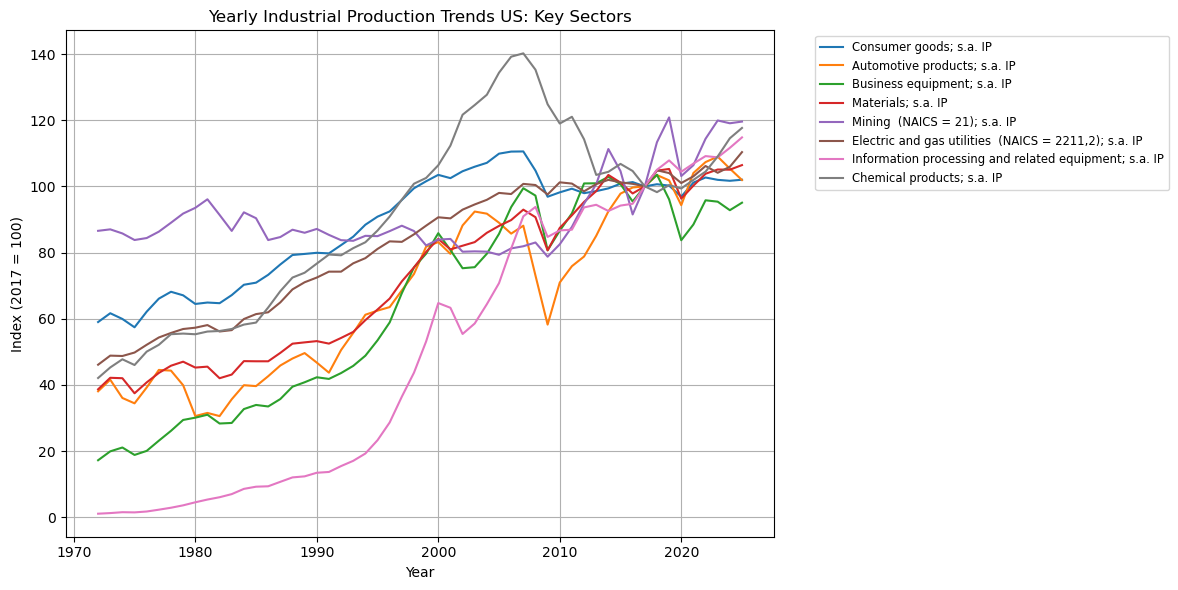

In [28]:
import matplotlib.pyplot as plt


df_selected = us_sectors_t[selected_columns].copy()


df_selected['Year'] = pd.to_datetime(df_selected['Year'], format='%Y-%m')


df_selected['YearOnly'] = df_selected['Year'].dt.year


df_yearly_avg = df_selected.groupby('YearOnly').mean(numeric_only=True).reset_index()


plt.figure(figsize=(12, 6))

for col in df_yearly_avg.columns[1:]:  # Skip 'YearOnly'
    plt.plot(df_yearly_avg['YearOnly'], df_yearly_avg[col], label=col)

plt.title('Yearly Industrial Production Trends US: Key Sectors')
plt.xlabel('Year')
plt.ylabel('Index (2017 = 100)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# insights on UK and US sector wise:

1)US sectors are rising above 100, with some reaching 120–140, while UK sectors mostly stay flat around 100.

2)US tech and chemical sectors show strong upward trends, but UK tech or pharma don’t show the same growth spike.

3)After COVID in 2020, US sectors quickly bounced back; UK sectors show a slower or weaker recovery.

4)US automotive and materials sectors are steadily climbing, while UK manufacturing and energy sectors remain volatile or declining.

5)The US chart shows consistent long-term growth across sectors since the 1970s; the UK chart shows flat or fluctuating lines since 2008.

6)Overall, the US lines trend upward, while UK lines are mostly horizontal, showing lack of strong growth momentum.